<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/6Sates_ClusterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=3147393e706f0d36590b7d199663606ad42f8fff4b2dfcfe6bb7c5727d9b4721
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
import pandas as pd
import wget 
from PIL import Image

from tqdm import tqdm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os
from pandas import Series, datetime
from pandas.plotting import scatter_matrix, autocorrelation_plot
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBClassifier
from sklearn.mixture import GaussianMixture

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Cluster Result Analysis

In [4]:
maryland_sd_inertia_6states_filtered = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/Maryland_Inertia_Data/Maryland_inertia_clusterlabeled_Oct23.csv',low_memory=False)
maryland_sd_inertia_6states_filtered.head(2)

State Postal Code  STFIPS  ...  COVID death rate cluster  cluster_label
0  New York          NY      36  ...               0.0       1      cluster_1
1  New York          NY      36  ...               0.0       1      cluster_1

[2 rows x 47 columns]

In [28]:
maryland_sd_inertia_6states_filtered.head(2)

State Postal Code  STFIPS  ...  COVID death rate cluster  cluster_label
0  New York          NY      36  ...               0.0       1      cluster_1
1  New York          NY      36  ...               0.0       1      cluster_1

[2 rows x 47 columns]

## All Cluster Analysis

### Basic Stats

In [128]:
maryland_sd_inertia_6states_filtered['cluster_label'].nunique()

88

In [129]:
maryland_sd_inertia_6states_filtered['cluster_label'].unique()

array(['cluster_1', 'cluster_2', 'cluster_3', 'cluster_0_3',
       'cluster_0_2', 'cluster_0_1_1', 'cluster_0_1_4', 'cluster_0_1_3',
       'cluster_0_1_0', 'cluster_0_1_2', 'cluster_0_0_4',
       'cluster_0_0_3_1', 'cluster_0_0_3_4', 'cluster_0_0_3_3',
       'cluster_0_0_3_0', 'cluster_0_0_3_2', 'cluster_0_0_1_2',
       'cluster_0_0_1_3', 'cluster_0_0_1_0_2', 'cluster_0_0_1_0_0',
       'cluster_0_0_1_0_3', 'cluster_0_0_1_0_4', 'cluster_0_0_1_0_1',
       'cluster_0_0_1_4_2', 'cluster_0_0_1_4_1', 'cluster_0_0_1_4_4',
       'cluster_0_0_1_4_3', 'cluster_0_0_1_4_0_3', 'cluster_0_0_1_4_0_1',
       'cluster_0_0_1_4_0_0', 'cluster_0_0_1_4_0_2',
       'cluster_0_0_1_4_0_4', 'cluster_0_0_1_1_0', 'cluster_0_0_1_1_4',
       'cluster_0_0_1_1_1', 'cluster_0_0_1_1_3', 'cluster_0_0_1_1_2_0',
       'cluster_0_0_1_1_2_2', 'cluster_0_0_1_1_2_3',
       'cluster_0_0_1_1_2_4', 'cluster_0_0_1_1_2_1', 'cluster_0_0_0_0',
       'cluster_0_0_0_4', 'cluster_0_0_0_2', 'cluster_0_0_0_1_2',
       'cl

In [130]:
pd.set_option('display.max_rows', None)

In [131]:
maryland_sd_inertia_6states_filtered.groupby(['cluster_label']).size().reset_index(name='row_count').sort_values(by='row_count', ascending=False)

cluster_label  row_count
12      cluster_0_0_0_4       3947
59        cluster_0_0_4       3801
25    cluster_0_0_1_1_3       3756
13    cluster_0_0_1_0_0       3317
19    cluster_0_0_1_1_1       3129
28      cluster_0_0_1_3       3098
26    cluster_0_0_1_1_4       2866
37    cluster_0_0_1_4_4       2853
15    cluster_0_0_1_0_2       2800
27      cluster_0_0_1_2       2719
75        cluster_4_0_0       2691
77        cluster_4_0_2       2601
70        cluster_0_4_3       2591
63        cluster_0_1_3       2521
30  cluster_0_0_1_4_0_1       2473
14    cluster_0_0_1_0_1       2382
35    cluster_0_0_1_4_2       2338
61        cluster_0_1_1       2280
57      cluster_0_0_3_3       2272
17    cluster_0_0_1_0_4       2152
67        cluster_0_4_0       2141
18    cluster_0_0_1_1_0       2138
16    cluster_0_0_1_0_3       2112
86          cluster_4_3       2084
71        cluster_0_4_4       2083
2     cluster_0_0_0_1_1       2082
9     cluster_0_0_0_3_2       1893
20  cluster_0_0_1_1_2_0       1864
11    cluster_0_0_0_3_4       1822
0       cluster_0_0_0_0       1812
23  cluster_0_0_1_1_2_3       1810
38      cluster_0_0_2_0       1797
39    cluster_0_0_2_2_0       1774
6       cluster_0_0_0_2       1746
31  cluster_0_0_1_4_0_2       1629
49    cluster_0_0_2_4_0       1545
1     cluster_0_0_0_1_0       1541
64        cluster_0_1_4       1536
4     cluster_0_0_0_1_3       1499
55      cluster_0_0_3_1       1491
54      cluster_0_0_3_0       1399
42    cluster_0_0_2_2_3       1369
80          cluster_4_2       1366
21  cluster_0_0_1_1_2_1       1350
50    cluster_0_0_2_4_1       1301
10    cluster_0_0_0_3_3       1216
34    cluster_0_0_1_4_1       1209
43    cluster_0_0_2_2_4       1188
52    cluster_0_0_2_4_3       1181
65          cluster_0_2       1142
79        cluster_4_0_4       1138
7     cluster_0_0_0_3_0       1073
60        cluster_0_1_0       1062
68        cluster_0_4_1       1059
62        cluster_0_1_2       1011
22  cluster_0_0_1_1_2_2        999
32  cluster_0_0_1_4_0_3        987
24  cluster_0_0_1_1_2_4        960
47    cluster_0_0_2_3_3        924
5     cluster_0_0_0_1_4        910
76        cluster_4_0_1        898
58      cluster_0_0_3_4        832
8     cluster_0_0_0_3_1        816
48    cluster_0_0_2_3_4        767
45    cluster_0_0_2_3_1        765
40    cluster_0_0_2_2_1        752
66          cluster_0_3        751
53    cluster_0_0_2_4_4        720
69        cluster_0_4_2        666
84        cluster_4_2_3        607
74            cluster_3        588
72            cluster_1        574
56      cluster_0_0_3_2        523
3     cluster_0_0_0_1_2        512
87          cluster_4_4        486
33  cluster_0_0_1_4_0_4        430
41    cluster_0_0_2_2_2        395
44    cluster_0_0_2_3_0        391
46    cluster_0_0_2_3_2        372
83        cluster_4_2_2        347
51    cluster_0_0_2_4_2        317
73            cluster_2        287
82        cluster_4_2_1        282
29  cluster_0_0_1_4_0_0        245
78        cluster_4_0_3        190
81        cluster_4_2_0        120
36    cluster_0_0_1_4_3         72
85        cluster_4_2_4         10

### Min -Max Covid Case per Cluster

In [132]:
#min max of new cases by group

new_case1k_per_cluster = maryland_sd_inertia_6states_filtered.groupby(['cluster_label']).agg({'New cases/1000 people': ['mean', 'min', 'max','size']})

In [133]:
new_case1k_per_cluster.sort_values(by=[('New cases/1000 people', 'max')], ascending=False) #('New cases/1000 people', 'min'),

New cases/1000 people                      
                                     mean     min     max  size
cluster_label                                                  
cluster_4_0_0                    0.206500  0.0000  9.0602  2691
cluster_0_0_0_1_2                0.103186  0.0000  7.8662   512
cluster_0_0_1_0_0                0.103485  0.0000  7.6985  3317
cluster_4_0_2                    0.202812  0.0000  5.7504  2601
cluster_0_0_0_2                  0.082567  0.0000  5.1960  1746
cluster_0_0_0_3_1                0.055642  0.0000  5.0984   816
cluster_0_0_0_1_0                0.036272  0.0000  5.0462  1541
cluster_0_4_0                    0.186789  0.0000  4.9803  2141
cluster_0_0_0_1_3                0.070550  0.0000  3.9697  1499
cluster_4_0_3                    0.428445  0.0000  3.6116   190
cluster_2                        0.499947  0.0000  3.4561   287
cluster_4_3                      0.222174  0.0000  3.3682  2084
cluster_4_0_1                    0.186274  0.0000  3.3000   898
cluster_0_4_2                    0.169417  0.0000  3.2744   666
cluster_0_0_0_0                  0.060192  0.0000  2.8928  1812
cluster_0_0_2_3_0                0.297905  0.0276  2.7290   391
cluster_0_0_1_1_0                0.021000  0.0000  2.6860  2138
cluster_0_0_2_2_0                0.246737  0.0000  2.4691  1774
cluster_0_4_3                    0.086752  0.0000  2.2920  2591
cluster_0_1_1                    0.102917  0.0000  2.1681  2280
cluster_0_4_4                    0.162548  0.0000  2.0973  2083
cluster_0_0_2_3_3                0.321815  0.0000  2.0518   924
cluster_0_0_0_4                  0.052908  0.0000  2.0503  3947
cluster_0_0_4                    0.062784  0.0000  2.0391  3801
cluster_0_0_1_0_2                0.036568  0.0000  1.9719  2800
cluster_0_0_2_2_3                0.290081  0.0000  1.8867  1369
cluster_4_0_4                    0.181135  0.0000  1.7823  1138
cluster_4_2_3                    0.169390  0.0000  1.7805   607
cluster_4_2                      0.106540  0.0000  1.7805  1366
cluster_0_1_4                    0.262014  0.0000  1.7668  1536
cluster_0_0_2_0                  0.225295  0.0000  1.6565  1797
cluster_0_0_0_3_0                0.046729  0.0000  1.5825  1073
cluster_0_0_2_3_2                0.384857  0.0000  1.5524   372
cluster_0_0_2_3_4                0.202053  0.0000  1.4391   767
cluster_0_0_0_3_3                0.023067  0.0000  1.4060  1216
cluster_0_0_2_2_1                0.124042  0.0000  1.3886   752
cluster_0_0_2_2_2                0.178187  0.0000  1.3717   395
cluster_0_0_2_4_0                0.113060  0.0000  1.3232  1545
cluster_0_0_0_1_1                0.022099  0.0000  1.3211  2082
cluster_0_4_1                    0.139996  0.0000  1.3002  1059
cluster_0_0_1_0_3                0.063876  0.0000  1.2859  2112
cluster_4_4                      0.221008  0.0000  1.2699   486
cluster_0_0_3_4                  0.075866  0.0000  1.2321   832
cluster_0_3                      0.201423  0.0000  1.2045   751
cluster_0_0_2_4_1                0.147409  0.0000  1.2031  1301
cluster_0_0_0_3_4                0.042918  0.0000  1.2008  1822
cluster_0_0_0_3_2                0.024007  0.0000  1.1171  1893
cluster_3                        0.123605  0.0000  1.0997   588
cluster_0_0_2_2_4                0.101285  0.0000  1.0807  1188
cluster_0_1_2                    0.040318  0.0000  1.0507  1011
cluster_4_2_0                    0.125952  0.0000  0.9914   120
cluster_0_0_1_0_4                0.032899  0.0000  0.9500  2152
cluster_0_0_2_4_4                0.088942  0.0000  0.9005   720
cluster_0_0_2_3_1                0.138840  0.0000  0.7971   765
cluster_0_0_3_1                  0.006899  0.0000  0.7905  1491
cluster_0_1_0                    0.069361  0.0027  0.6066  1062
cluster_0_0_0_1_4                0.012009  0.0000  0.6026   910
cluster_0_0_2_4_2                0.059925  0.0000  0.5397   317
cluster_0_0_2_4_3                0.088664  0.0000  0.5290  1181
cluster_4_2_1                    0.039163  0.0000  0

In [159]:
pos_cor_columns = ['CTNAME','Social distancing index','% change in consumption',
                   '% staying home','Trips/person','% out-of-state trips','Miles/person',
                   'Work trips/person','Non-work trips/person','% working from home',
                   '% people older than 60','Median income','% African Americans', '% Hispanic Americans','% Male','Population density',
                   'Employment density','Hospital beds/1000 people','Testing capacity','Tests done/1000 people',
                   '% ICU utilization','COVID exposure/1000 people',
                    'New cases/1000 people']

## 1.cluster_4_0_0



### Different Analysis

In [5]:
maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_4_0_0']['New cases/1000 people'].shape

(2691,)

In [6]:
cluster_4_0_0= maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_4_0_0']
cluster_4_0_0.reset_index(drop=True)

State Postal Code  STFIPS  ...  COVID death rate cluster  cluster_label
0     New York          NY      36  ...              1.96       0  cluster_4_0_0
1     New York          NY      36  ...             15.63       0  cluster_4_0_0
2     New York          NY      36  ...             15.37       0  cluster_4_0_0
3     New York          NY      36  ...              1.96       0  cluster_4_0_0
4     New York          NY      36  ...              1.96       0  cluster_4_0_0
...        ...         ...     ...  ...               ...     ...            ...
2686     Texas          TX      48  ...              1.43       0  cluster_4_0_0
2687     Texas          TX      48  ...              1.41       0  cluster_4_0_0
2688     Texas          TX      48  ...              1.41       0  cluster_4_0_0
2689     Texas          TX      48  ...              1.43       0  cluster_4_0_0
2690     Texas          TX      48  ...              1.43       0  cluster_4_0_0

[2691 rows x 47 columns]

### States

In [7]:
#states of cluster one

cluster_4_0_0.State.unique()


array(['New York', 'Texas'], dtype=object)

In [8]:
cluster_4_0_0.CTNAME.nunique()

198

In [9]:
#states of cluster one

cluster_4_0_0.CTNAME.unique()

array(['Allegany County', 'Broome County', 'Cattaraugus County',
       'Cayuga County', 'Chautauqua County', 'Chenango County',
       'Clinton County', 'Columbia County', 'Cortland County',
       'Delaware County', 'Essex County', 'Franklin County',
       'Fulton County', 'Genesee County', 'Hamilton County',
       'Herkimer County', 'Jefferson County', 'Lewis County',
       'Livingston County', 'Madison County', 'Montgomery County',
       'Niagara County', 'Oneida County', 'Ontario County',
       'Orleans County', 'Otsego County', 'Putnam County',
       'Rensselaer County', 'St. Lawrence County', 'Schenectady County',
       'Schoharie County', 'Schuyler County', 'Seneca County',
       'Steuben County', 'Sullivan County', 'Tioga County',
       'Tompkins County', 'Ulster County', 'Warren County',
       'Washington County', 'Wayne County', 'Wyoming County',
       'Yates County', 'Aransas County', 'Atascosa County',
       'Bailey County', 'Bandera County', 'Baylor County', '

In [10]:
#min max of new cases by each county of cluster

cluster_4_0_0.groupby(['CTNAME']).agg({'New cases/1000 people': ['mean', 'min', 'max']})

New cases/1000 people                
                                 mean     min     max
CTNAME                                               
Allegany County              0.000000  0.0000  0.0000
Aransas County               0.165783  0.1401  0.2102
Atascosa County              0.082850  0.0464  0.1193
Bailey County                0.392427  0.0474  0.9013
Bandera County               0.039269  0.0000  0.1022
...                               ...     ...     ...
Wyoming County               0.024900  0.0249  0.0249
Yates County                 0.021460  0.0000  0.0805
Young County                 0.263225  0.1108  0.4618
Zapata County                0.552025  0.2349  0.7282
Zavala County                0.514600  0.2782  0.6954

[198 rows x 3 columns]

In [11]:
cluster_4_0_0.describe().T

count  ...            max
STFIPS                                 2691.0  ...      48.000000
CTFIPS                                 2691.0  ...   48507.000000
Social distancing index                2691.0  ...      86.000000
% staying home                         2691.0  ...      57.000000
Trips/person                           2691.0  ...       9.080000
% out-of-county trips                  2691.0  ...     100.000000
% out-of-state trips                   2691.0  ...      41.100000
Miles/person                           2691.0  ...     285.900000
Work trips/person                      2691.0  ...       1.910000
Non-work trips/person                  2691.0  ...       9.070000
New COVID cases                        2691.0  ...     227.000000
Population                             2691.0  ...  275910.000000
% change in consumption                2691.0  ...     229.500000
Transit mode share                     2691.0  ...       8.160000
% people older than 60                 2691.0  ...      46.000000
Median income                          2691.0  ...  102186.000000
% African Americans                    2691.0  ...      33.500000
% Hispanic Americans                   2691.0  ...      99.100000
% Male                                 2691.0  ...      66.190000
Population density                     2691.0  ...     739.000000
Employment density                     2691.0  ...     319.000000
# hot spots/1000 people                2691.0  ...     249.000000
Hospital beds/1000 people              2691.0  ...       2.820000
ICUs/1000 people                       2691.0  ...       0.300000
# contact tracing workers/1000 people  2691.0  ...       0.040000
New cases/1000 people                  2691.0  ...       9.060200
Active cases/1000 people               2691.0  ...      11.390000
#days: decreasing COVID cases          2691.0  ...      64.000000
% hospital bed utilization             2691.0  ...      95.568524
Testing capacity                       2691.0  ...      38.700000
Tests done/1000 people                 2691.0  ...     216.040000
% ICU utilization                      2691.0  ...     116.620000
Ventilator shortage                    2691.0  ...    4625.000000
Imported COVID cases                   2691.0  ...     410.000000
COVID exposure/1000 people             2691.0  ...      21.470000
#days: decreasing ILI cases            2691.0  ...     196.000000
Unemployment claims/1000 people        2691.0  ...      18.700000
Unemployment rate                      2691.0  ...      14.900000
% working from home                    2691.0  ...      40.200000
Cumulative inflation rate              2691.0  ...       0.800000
COVID death rate                       2691.0  ...      18.360000
cluster                                2691.0  ...       0.000000

[42 rows x 8 columns]

In [12]:
## Min value of all column

cluster_4_0_0.min(axis=0) # will return min value of each column

State                                           New York
Postal Code                                           NY
STFIPS                                                36
CTFIPS                                             36003
CTNAME                                   Allegany County
Social distancing index                                7
% staying home                                         0
Trips/person                                        0.77
% out-of-county trips                                3.4
% out-of-state trips                                   0
Miles/person                                        15.9
Work trips/person                                   0.01
Non-work trips/person                               0.76
New COVID cases                                        0
Population                                           442
% change in consumption                            -78.6
date                                          2020-03-27
Transit mode share             

In [13]:
## Max value of all column

cluster_4_0_0.max(axis=0) # will return max value of each column

State                                            Texas
Postal Code                                         TX
STFIPS                                              48
CTFIPS                                           48507
CTNAME                                   Zavala County
Social distancing index                             86
% staying home                                      57
Trips/person                                      9.08
% out-of-county trips                              100
% out-of-state trips                              41.1
Miles/person                                     285.9
Work trips/person                                 1.91
Non-work trips/person                             9.07
New COVID cases                                    227
Population                                      275910
% change in consumption                          229.5
date                                        2020-09-29
Transit mode share                                8.16
% people o

### Group Columns

In [14]:
cluster_4_0_0.columns

Index(['State', 'Postal Code', 'STFIPS', 'CTFIPS', 'CTNAME',
       'Social distancing index', '% staying home', 'Trips/person',
       '% out-of-county trips', '% out-of-state trips', 'Miles/person',
       'Work trips/person', 'Non-work trips/person', 'New COVID cases',
       'Population', '% change in consumption', 'date', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people', 'New cases/1000 people',
       'Active cases/1000 people', '#days: decreasing COVID cases',
       '% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 p

In [15]:
filter_col= ['Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','% change in consumption','Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

social_dist= ['CTNAME','Social distancing index','% change in consumption', 'New cases/1000 people']

mobility = ['CTNAME','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','Transit mode share',
       '% working from home', 'New cases/1000 people']

demographic = ['CTNAME','% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density','# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people','New cases/1000 people']

employment = ['CTNAME','Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

### Correlation Plot

#### 1.social_dist

In [18]:
social_dist

['CTNAME',
 'Social distancing index',
 '% change in consumption',
 'New cases/1000 people']

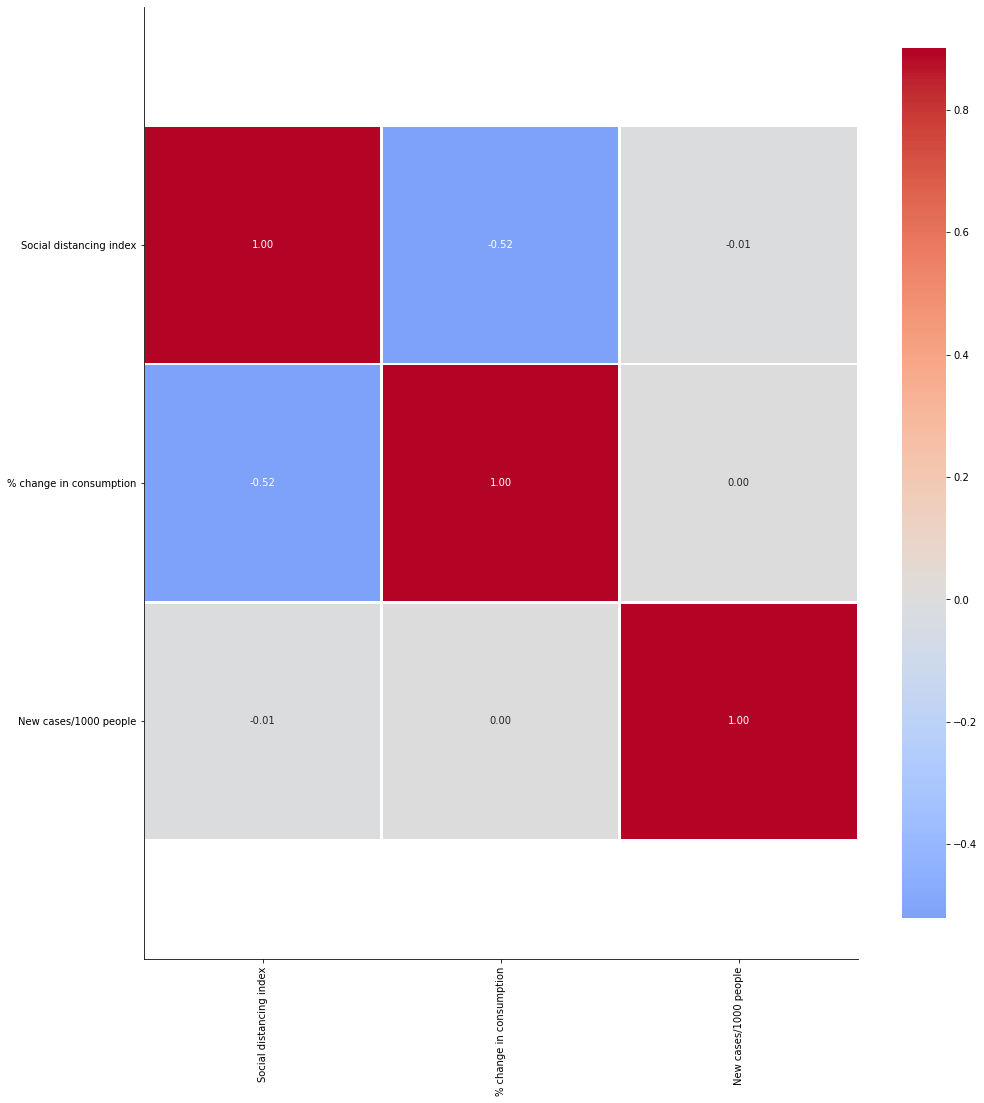

In [19]:
corr = cluster_4_0_0[social_dist].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 2.mobility

In [20]:
mobility


['CTNAME',
 '% staying home',
 'Trips/person',
 '% out-of-county trips',
 '% out-of-state trips',
 'Miles/person',
 'Work trips/person',
 'Non-work trips/person',
 'Transit mode share',
 '% working from home',
 'New cases/1000 people']

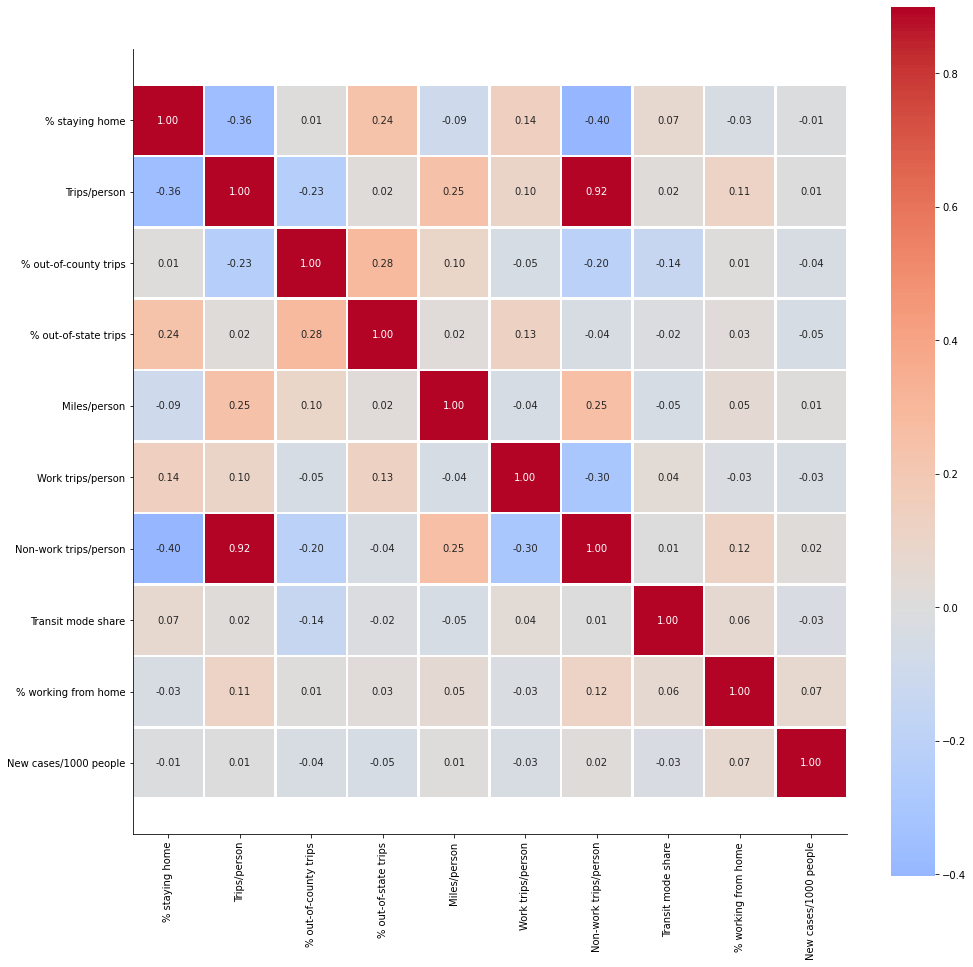

In [21]:
corr = cluster_4_0_0[mobility].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 3.demographic

In [22]:
demographic

['CTNAME',
 '% people older than 60',
 'Median income',
 '% African Americans',
 '% Hispanic Americans',
 '% Male',
 'Population density',
 'Employment density',
 '# hot spots/1000 people',
 'Hospital beds/1000 people',
 'ICUs/1000 people',
 '# contact tracing workers/1000 people',
 '% hospital bed utilization',
 'Testing capacity',
 'Tests done/1000 people',
 '% ICU utilization',
 'Ventilator shortage',
 'Imported COVID cases',
 'COVID exposure/1000 people',
 'New cases/1000 people']

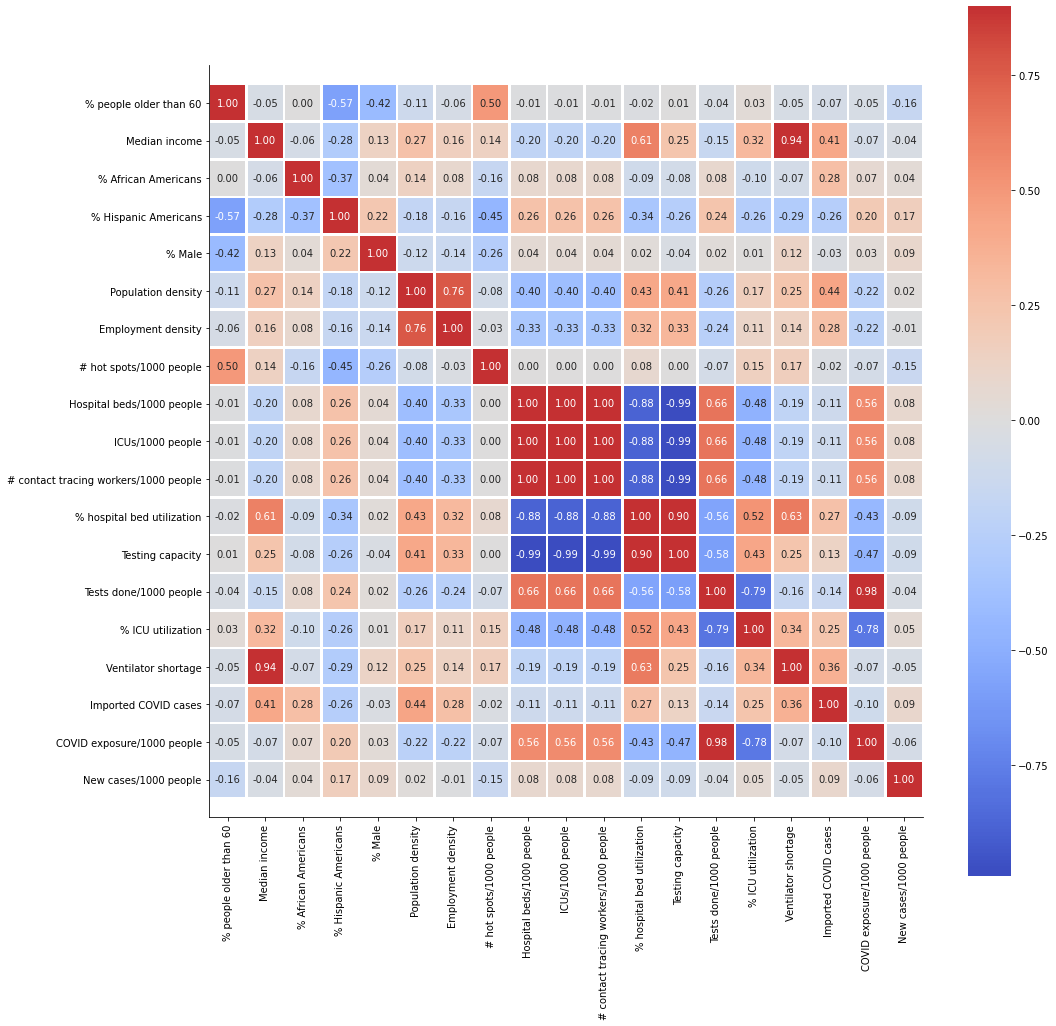

In [23]:
corr = cluster_4_0_0[demographic].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 4.employment

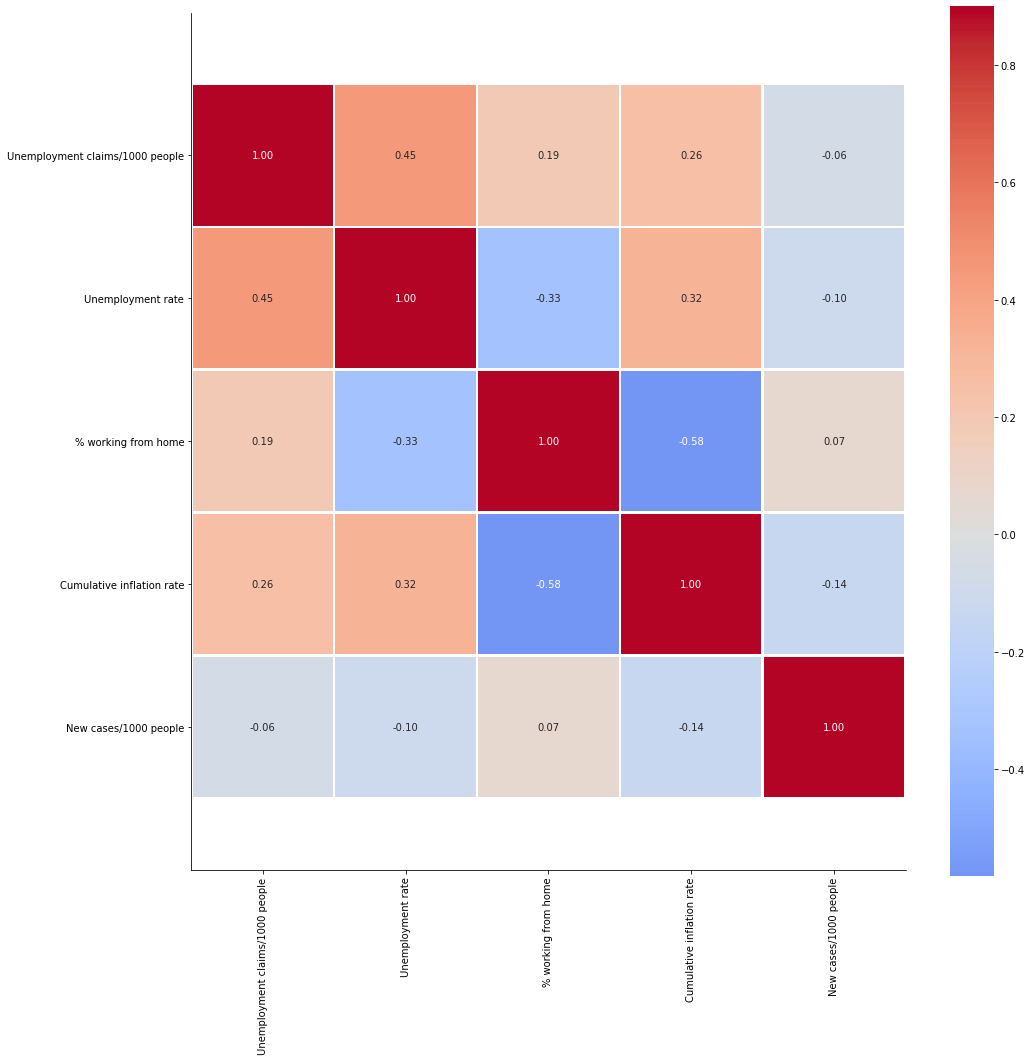

In [24]:
corr = cluster_4_0_0[employment].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 5.Pos_columns

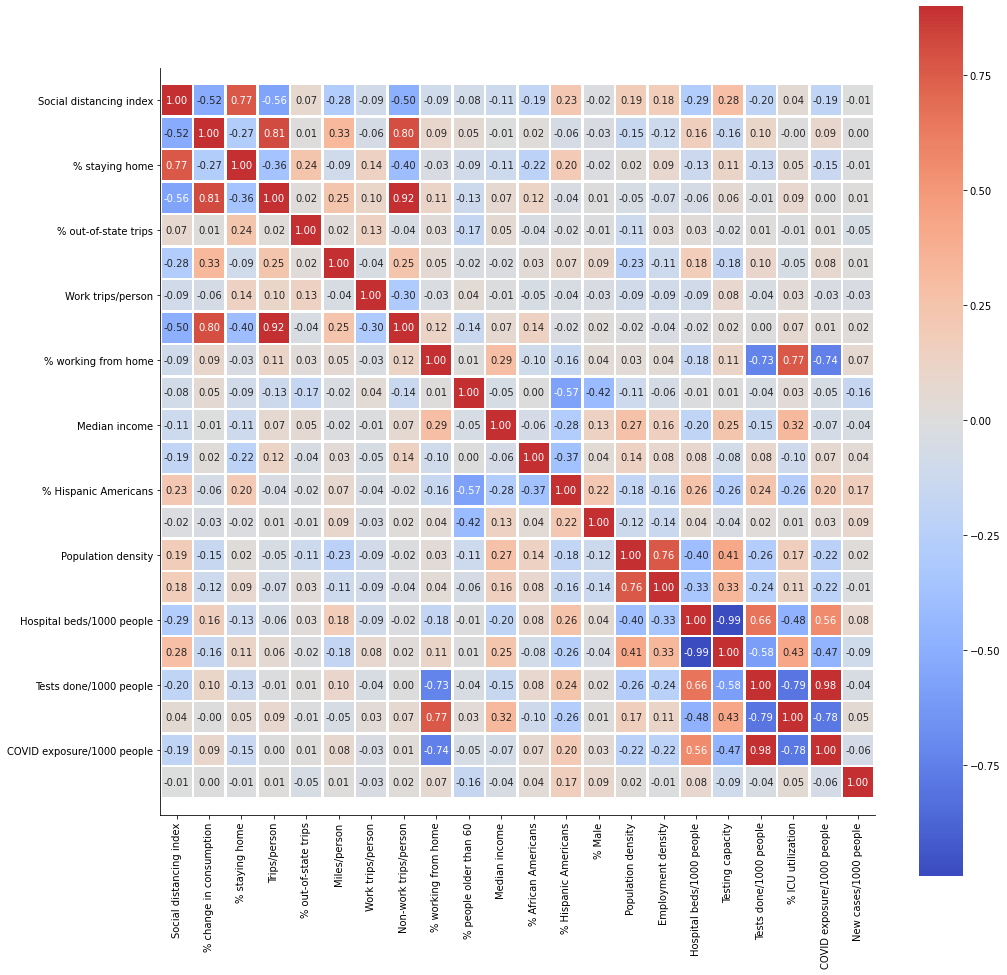

In [25]:
pos_cor_columns = ['CTNAME','Social distancing index','% change in consumption',
                   '% staying home','Trips/person','% out-of-state trips','Miles/person',
                   'Work trips/person','Non-work trips/person','% working from home',
                   '% people older than 60','Median income','% African Americans', '% Hispanic Americans','% Male','Population density',
                   'Employment density','Hospital beds/1000 people','Testing capacity','Tests done/1000 people',
                   '% ICU utilization','COVID exposure/1000 people',
                    'New cases/1000 people']
corr = cluster_4_0_0[pos_cor_columns].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

## 2.Cluster_0_0_0_1_2



### Different Analysis

In [93]:
maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_0_0_0_1_2']['New cases/1000 people'].shape

(512,)

In [94]:
cluster_4= maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_0_0_0_1_2']
cluster_4.reset_index(drop=True)

State Postal Code  STFIPS  ...  COVID death rate cluster      cluster_label
0        Iowa          IA      19  ...              3.45       2  cluster_0_0_0_1_2
1        Iowa          IA      19  ...              3.52       2  cluster_0_0_0_1_2
2        Iowa          IA      19  ...              3.50       2  cluster_0_0_0_1_2
3        Iowa          IA      19  ...              3.45       2  cluster_0_0_0_1_2
4        Iowa          IA      19  ...              3.53       2  cluster_0_0_0_1_2
5        Iowa          IA      19  ...              3.49       2  cluster_0_0_0_1_2
6        Iowa          IA      19  ...              3.49       2  cluster_0_0_0_1_2
7        Iowa          IA      19  ...              3.37       2  cluster_0_0_0_1_2
8        Iowa          IA      19  ...              3.45       2  cluster_0_0_0_1_2
9        Iowa          IA      19  ...              3.52       2  cluster_0_0_0_1_2
10       Iowa          IA      19  ...              3.50       2  cluster_0_0_0_1_2
11       Iowa          IA      19  ...              3.45       2  cluster_0_0_0_1_2
12       Iowa          IA      19  ...              3.53       2  cluster_0_0_0_1_2
13       Iowa          IA      19  ...              3.49       2  cluster_0_0_0_1_2
14       Iowa          IA      19  ...              3.49       2  cluster_0_0_0_1_2
15       Iowa          IA      19  ...              3.37       2  cluster_0_0_0_1_2
16       Iowa          IA      19  ...              3.45       2  cluster_0_0_0_1_2
17       Iowa          IA      19  ...              3.52       2  cluster_0_0_0_1_2
18       Iowa          IA      19  ...              3.50       2  cluster_0_0_0_1_2
19       Iowa          IA      19  ...              3.45       2  cluster_0_0_0_1_2
20       Iowa          IA      19  ...              3.53       2  cluster_0_0_0_1_2
21       Iowa          IA      19  ...              3.49       2  cluster_0_0_0_1_2
22       Iowa          IA      19  ...              3.49       2  cluster_0_0_0_1_2
23       Iowa          IA      19  ...              3.67       2  cluster_0_0_0_1_2
24       Iowa          IA      19  ...              3.54       2  cluster_0_0_0_1_2
25       Iowa          IA      19  ...              3.42       2  cluster_0_0_0_1_2
26       Iowa          IA      19  ...              3.36       2  cluster_0_0_0_1_2
27       Iowa          IA      19  ...              3.44       2  cluster_0_0_0_1_2
28       Iowa          IA      19  ...              3.38       2  cluster_0_0_0_1_2
29       Iowa          IA      19  ...              3.35       2  cluster_0_0_0_1_2
30       Iowa          IA      19  ...              3.34       2  cluster_0_0_0_1_2
31       Iowa          IA      19  ...              3.26       2  cluster_0_0_0_1_2
32       Iowa          IA      19  ...              3.11       2  cluster_0_0_0_1_2
33       Iowa          IA      19  ...              3.29       2  cluster_0_0_0_1_2
34       Iowa          IA      19  ...              3.37       2  cluster_0_0_0_1_2
35       Iowa          IA      19  ...              3.45       2  cluster_0_0_0_1_2
36       Iowa          IA      19  ...              3.52       2  cluster_0_0_0_1_2
37       Iowa          IA      19  ...              3.50       2  cluster_0_0_0_1_2
38       Iowa          IA      19  ...              3.45       2  cluster_0_0_0_1_2
39       Iowa          IA      19  ...              3.53       2  cluster_0_0_0_1_2
40       Iowa          IA      19  ...              3.49       2  cluster_0_0_0_1_2
41       Iowa          IA      19  ...              3.49       2  cluster_0_0_0_1_2
42       Iowa          IA      19  ...              3.44       2  cluster_0_0_0_1_2
43       Iowa          IA      19  ...              3.43       2  cluster_0_0_0_1_2
44       Iowa          IA      19  ...              3.37       2  cluster_0_0_0_1_2
45       Iowa          IA      19  ...              3.45       2  cluster_0_0_0_1_2
46       Iowa          IA      19  ...              3.52    

In [95]:
cluster_4['New cases/1000 people']

79263    0.0472
79264    0.0944
79265    0.0944
79266    0.0472
79267    0.0000
79268    0.0000
79269    0.0000
79270    0.1829
79271    0.1829
79272    0.1829
79273    0.0000
79274    0.0000
79275    0.0000
79276    0.0000
79277    0.0000
79278    0.0241
79279    0.0482
79280    0.0482
79281    0.0241
79282    0.0241
79283    0.0241
79284    0.0241
79285    0.0000
79286    0.0000
79287    0.0268
79288    0.0268
79289    0.0268
79290    0.0000
79291    0.0000
79292    0.0000
79293    0.0268
79294    0.1072
79295    0.1072
79296    0.1072
79297    0.0268
79298    0.0536
79299    0.0268
79300    0.0536
79301    0.0268
79302    0.0268
79303    0.0000
79304    0.0000
79305    0.0804
79306    0.0804
79307    0.0605
79308    0.0605
79309    0.0000
79310    0.0000
79311    0.0000
79312    0.0000
79313    0.0605
79314    0.0605
79315    7.8662
79316    0.8889
79317    1.3586
79318    1.4927
79319    1.9624
79320    2.2643
79321    0.0229
79322    0.0459
79323    0.0459
79324    0.0229
79325   

### States

In [96]:
#states of cluster one

cluster_4.State.unique()


array(['Iowa', 'New York', 'Texas'], dtype=object)

In [97]:
cluster_4.CTNAME.nunique()

68

In [98]:
#states of cluster one

cluster_4.CTNAME.unique()

array(['Adair County', 'Adams County', 'Allamakee County',
       'Appanoose County', 'Audubon County', 'Buena Vista County',
       'Butler County', 'Calhoun County', 'Carroll County', 'Cass County',
       'Cerro Gordo County', 'Cherokee County', 'Chickasaw County',
       'Clarke County', 'Clay County', 'Clayton County',
       'Crawford County', 'Decatur County', 'Emmet County',
       'Fayette County', 'Floyd County', 'Franklin County',
       'Fremont County', 'Greene County', 'Guthrie County',
       'Hamilton County', 'Hardin County', 'Henry County',
       'Howard County', 'Humboldt County', 'Ida County', 'Iowa County',
       'Jackson County', 'Jasper County', 'Jefferson County',
       'Jones County', 'Keokuk County', 'Kossuth County', 'Lee County',
       'Louisa County', 'Lucas County', 'Mahaska County', 'Marion County',
       'Marshall County', 'Mitchell County', 'Monona County',
       'Monroe County', 'Montgomery County', "O'Brien County",
       'Page County', 'Palo A

In [99]:
#min max of new cases by each county of cluster

cluster_4.groupby(['CTNAME']).agg({'New cases/1000 people': ['mean', 'min', 'max']})

New cases/1000 people                
                                    mean     min     max
CTNAME                                                  
Adair County                    0.040457  0.0000  0.0944
Adams County                    0.068587  0.0000  0.1829
Allamakee County                0.027113  0.0000  0.0482
Appanoose County                0.038286  0.0000  0.1072
Audubon County                  0.030250  0.0000  0.0605
Buena Vista County              2.638850  0.8889  7.8662
Burnet County                   0.025220  0.0070  0.0701
Butler County                   0.034400  0.0229  0.0459
Calhoun County                  0.012887  0.0000  0.0687
Carroll County                  0.049600  0.0496  0.0496
Cass County                     0.023210  0.0000  0.1289
Cerro Gordo County              0.019550  0.0078  0.0313
Cherokee County                 0.147240  0.1178  0.2356
Chickasaw County                0.041775  0.0000  0.0557
Clarke County                   0.353738  0.2122  0.5306
Clay County                     0.052600  0.0000  0.1033
Clayton County                  0.035286  0.0000  0.0570
Crawford County                 0.385757  0.0583  0.5245
Decatur County                  0.012660  0.0000  0.0422
Emmet County                    0.128078  0.0000  0.2161
Fayette County                  0.017782  0.0000  0.0789
Floyd County                    0.019200  0.0000  0.0634
Franklin County                 0.093300  0.0329  0.1317
Fremont County                  0.000000  0.0000  0.0000
Gillespie County                0.001033  0.0000  0.0124
Greene County                   0.000000  0.0000  0.0000
Guthrie County                  0.093300  0.0933  0.0933
Hamilton County                 0.141167  0.0000  0.2898
Hardin County                   0.029667  0.0198  0.0593
Henry County                    0.047443  0.0166  0.0997
Howard County                   0.000000  0.0000  0.0000
Humboldt County                 0.079771  0.0349  0.1047
Ida County                      0.000000  0.0000  0.0000
Iowa County                     0.020700  0.0207  0.0207
Jackson County                  0.014317  0.0000  0.0343
Jasper County                   0.026900  0.0269  0.0269
Jefferson County                0.069663  0.0000  0.1995
Jones County                    0.006440  0.0000  0.0161
Keokuk County                   0.016300  0.0000  0.0326
Kerr County                     0.002133  0.0000  0.0064
Kossuth County                  0.044720  0.0000  0.0894
Lee County                      0.020825  0.0098  0.0294
Louisa County                   0.141775  0.0597  0.2388
Lucas County                    0.178325  0.0386  0.3856
Mahaska County                  0.067129  0.0455  0.1061
Marion County                   0.020000  0.0200  0.0200
Marshall County                 0.085743  0.0417  0.1334
Mitchell County                 0.000000  0.0000  0.0000
Monona County                   0.072000  0.0000  0.1920
Monroe County                   0.076078  0.0000  0.2139
Montgomery County               0.026640  0.0000  0.0666
O'Brien County                  0.092900  0.0241  0.1686
Page County                     0.032813  0.0000  0.0656
Palo Alto County                0.063986  0.0000  0.1120
Pocahontas County               0.173088  0.0989  0.3462
Poweshiek County                0.017814  0.0000  0.0357
Ringgold County                 0.000000  0.0000  0.0000
Sac County                      0.111475  0.0686  0.2058
Shelby County                   0.036000  0.0000  0.0864
Tama County                     0.059160  0.0394  0.0986
Taylor County                   0.520467  0.1615  1.6152
Union County                    0.044127  0.0270  0.0809
Van Buren County                0.025909  0.0000  0.0950
Wayne County                    0.000000  0.0000  0.0000
Webster County                  0.044794  0.0000  0.0919
Winnebago County                0.011887  0.0000  0.0317
Worth County                    0.000000  0.0000  0.0000
Wright County                

In [100]:
cluster_4.describe().T

count  ...           max
STFIPS                                 512.0  ...     48.000000
CTFIPS                                 512.0  ...  48265.000000
Social distancing index                512.0  ...     53.000000
% staying home                         512.0  ...     34.000000
Trips/person                           512.0  ...      4.970000
% out-of-county trips                  512.0  ...     66.800000
% out-of-state trips                   512.0  ...     46.600000
Miles/person                           512.0  ...    146.300000
Work trips/person                      512.0  ...      0.950000
Non-work trips/person                  512.0  ...      4.440000
New COVID cases                        512.0  ...     66.000000
Population                             512.0  ...  52405.000000
% change in consumption                512.0  ...     69.600000
Transit mode share                     512.0  ...      2.820000
% people older than 60                 512.0  ...     38.000000
Median income                          512.0  ...  59238.000000
% African Americans                    512.0  ...      6.400000
% Hispanic Americans                   512.0  ...     27.800000
% Male                                 512.0  ...     51.690000
Population density                     512.0  ...     75.000000
Employment density                     512.0  ...     43.000000
# hot spots/1000 people                512.0  ...    249.000000
Hospital beds/1000 people              512.0  ...      3.690000
ICUs/1000 people                       512.0  ...      0.300000
# contact tracing workers/1000 people  512.0  ...      0.040000
New cases/1000 people                  512.0  ...      7.866200
Active cases/1000 people               512.0  ...      4.040000
#days: decreasing COVID cases          512.0  ...     35.000000
% hospital bed utilization             512.0  ...     65.154595
Testing capacity                       512.0  ...     14.900000
Tests done/1000 people                 512.0  ...    173.740000
% ICU utilization                      512.0  ...     15.630000
Ventilator shortage                    512.0  ...    221.000000
Imported COVID cases                   512.0  ...    113.000000
COVID exposure/1000 people             512.0  ...     17.250000
#days: decreasing ILI cases            512.0  ...    119.000000
Unemployment claims/1000 people        512.0  ...      4.600000
Unemployment rate                      512.0  ...     15.800000
% working from home                    512.0  ...     42.400000
Cumulative inflation rate              512.0  ...      0.800000
COVID death rate                       512.0  ...      9.270000
cluster                                512.0  ...      2.000000

[42 rows x 8 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


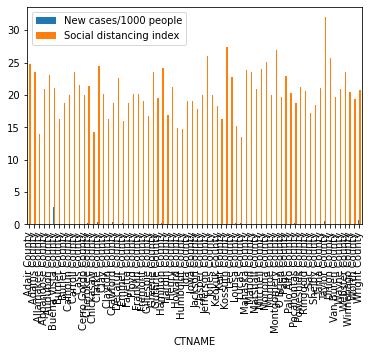

In [101]:
cluster_4.groupby("CTNAME")['New cases/1000 people', 'Social distancing index'].mean().plot(kind='bar')

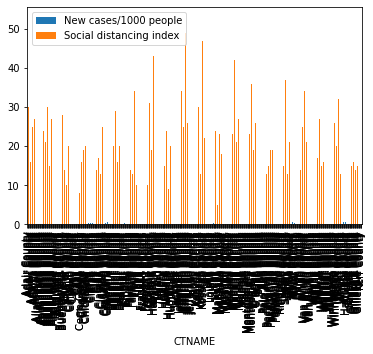

In [102]:
cluster_4.plot(x="CTNAME", y=['New cases/1000 people', 'Social distancing index'], kind="bar")

In [103]:
## Min value of all column

cluster_4.min(axis=0) # will return min value of each column

State                                                 Iowa
Postal Code                                             IA
STFIPS                                                  19
CTFIPS                                               19001
CTNAME                                        Adair County
Social distancing index                                  5
% staying home                                           7
Trips/person                                          2.44
% out-of-county trips                                 21.6
% out-of-state trips                                   0.1
Miles/person                                          24.8
Work trips/person                                     0.05
Non-work trips/person                                 2.13
New COVID cases                                          0
Population                                            3645
% change in consumption                              -25.6
date                                            2020-05-

In [104]:
## Max value of all column

cluster_4.max(axis=0) # will return max value of each column

State                                                Texas
Postal Code                                             TX
STFIPS                                                  48
CTFIPS                                               48265
CTNAME                                       Wright County
Social distancing index                                 53
% staying home                                          34
Trips/person                                          4.97
% out-of-county trips                                 66.8
% out-of-state trips                                  46.6
Miles/person                                         146.3
Work trips/person                                     0.95
Non-work trips/person                                 4.44
New COVID cases                                         66
Population                                           52405
% change in consumption                               69.6
date                                            2020-06-

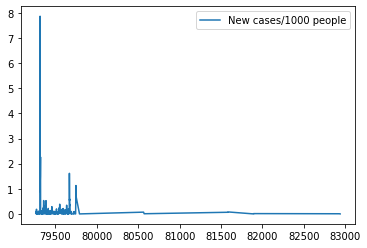

In [105]:
cluster_4[['date','New cases/1000 people']].plot()

In [106]:
cluster_4['date'].unique()

array(['2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31',
       '2020-06-01', '2020-06-02', '2020-06-03', '2020-05-27',
       '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
       '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23',
       '2020-05-24', '2020-05-25', '2020-05-26', '2020-06-04',
       '2020-06-05', '2020-06-20', '2020-06-21', '2020-06-09',
       '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-08',
       '2020-06-13'], dtype=object)

(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 <a list of 7 Text major ticklabel objects>)

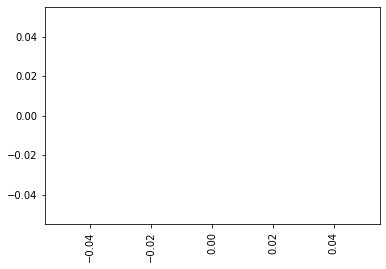

In [107]:
plt.figure()

date_list = ['2020-10-01', '2020-10-02',
       '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06',
       '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
       '2020-10-11', '2020-10-12', '2020-10-13']

filter_data = cluster_4[cluster_4['date'].isin(date_list)]
x = filter_data['date']
y1 = filter_data['New cases/1000 people'] 
y2 = filter_data['Social distancing index']


plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


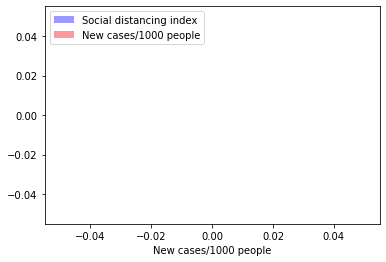

In [108]:
# Method 1: on the same Axis
date_list = ['2020-10-01', '2020-10-02',
       '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06',
       '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
       '2020-10-11', '2020-10-12', '2020-10-13']

filter_data = cluster_4[cluster_4['date'].isin(date_list)]

sns.distplot( (filter_data['Social distancing index']) , color="blue", label='Social distancing index')
sns.distplot( filter_data['New cases/1000 people'] , color="red", label='New cases/1000 people')
plt.legend()
 
plt.show()

New case for each county

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 8 Text major ticklabel objects>)

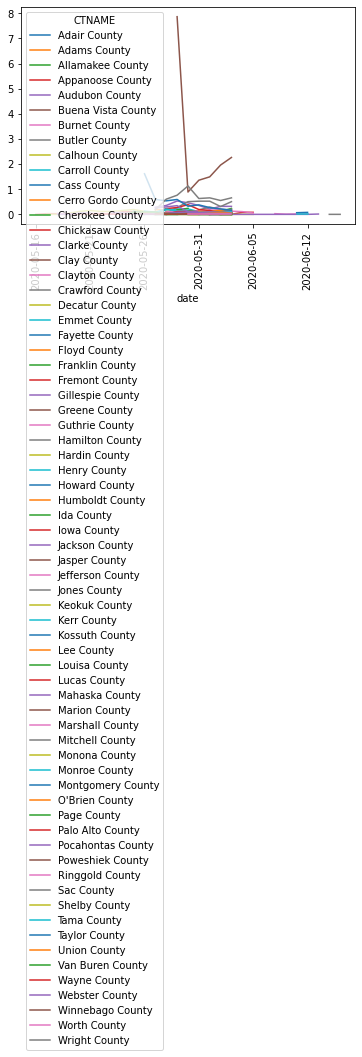

In [109]:
cluster_4.pivot(index='date', columns='CTNAME', values='New cases/1000 people').plot()
plt.xticks(rotation=90)

In [112]:
# Method 1: on the same Axis - NOT WORKING NOW
date_list = ['2020-10-01', '2020-10-02',
       '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06',
       '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
       '2020-10-11', '2020-10-12', '2020-10-13']

#filter_data = cluster_4[cluster_4['date'].isin(date_list)]
#filter_data.pivot(index='date', columns='CTNAME', values='New cases/1000 people').plot()
#plt.xticks(rotation=90)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

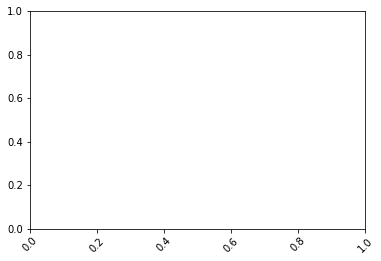

In [113]:
sns.lineplot(data=filter_data, hue='CTNAME', x='date', y='New cases/1000 people')
plt.xticks(rotation=45)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

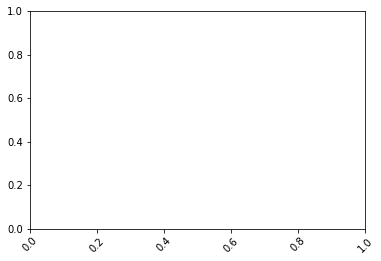

In [114]:
sns.lineplot(data=filter_data, hue='CTNAME', x='date', y='Social distancing index')
plt.xticks(rotation=45)

### Pairplot- All Column

In [115]:
# pairplot with hue day 
#sns.pairplot(cluster_4, hue ='CTNAME') 
# to show 
#plt.show()

### Group Columns

In [116]:
cluster_4.columns

Index(['State', 'Postal Code', 'STFIPS', 'CTFIPS', 'CTNAME',
       'Social distancing index', '% staying home', 'Trips/person',
       '% out-of-county trips', '% out-of-state trips', 'Miles/person',
       'Work trips/person', 'Non-work trips/person', 'New COVID cases',
       'Population', '% change in consumption', 'date', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people', 'New cases/1000 people',
       'Active cases/1000 people', '#days: decreasing COVID cases',
       '% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 p

In [117]:
filter_col= ['Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','% change in consumption','Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

social_dist= ['CTNAME','Social distancing index','% change in consumption', 'New cases/1000 people']

mobility = ['CTNAME','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','Transit mode share',
       '% working from home', 'New cases/1000 people']

demographic = ['CTNAME','% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density','# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people','New cases/1000 people']

employment = ['CTNAME','Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

### Pairplot- Using Column Groups 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

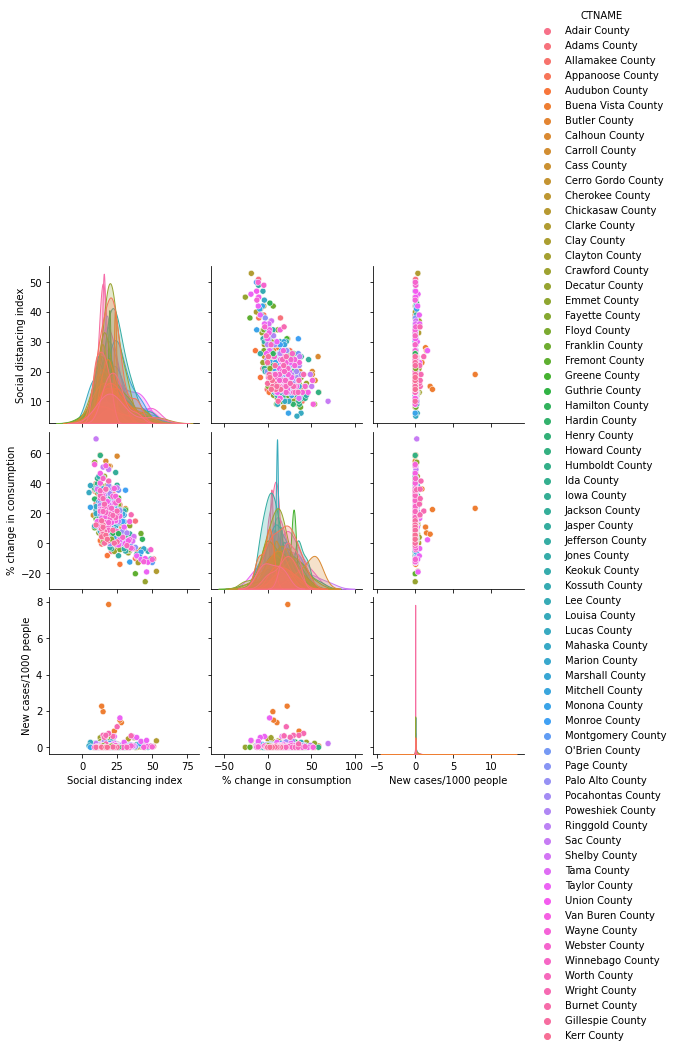

In [120]:
# pairplot with hue day 
sns.pairplot(cluster_4[social_dist], hue ='CTNAME') 
# to show 
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

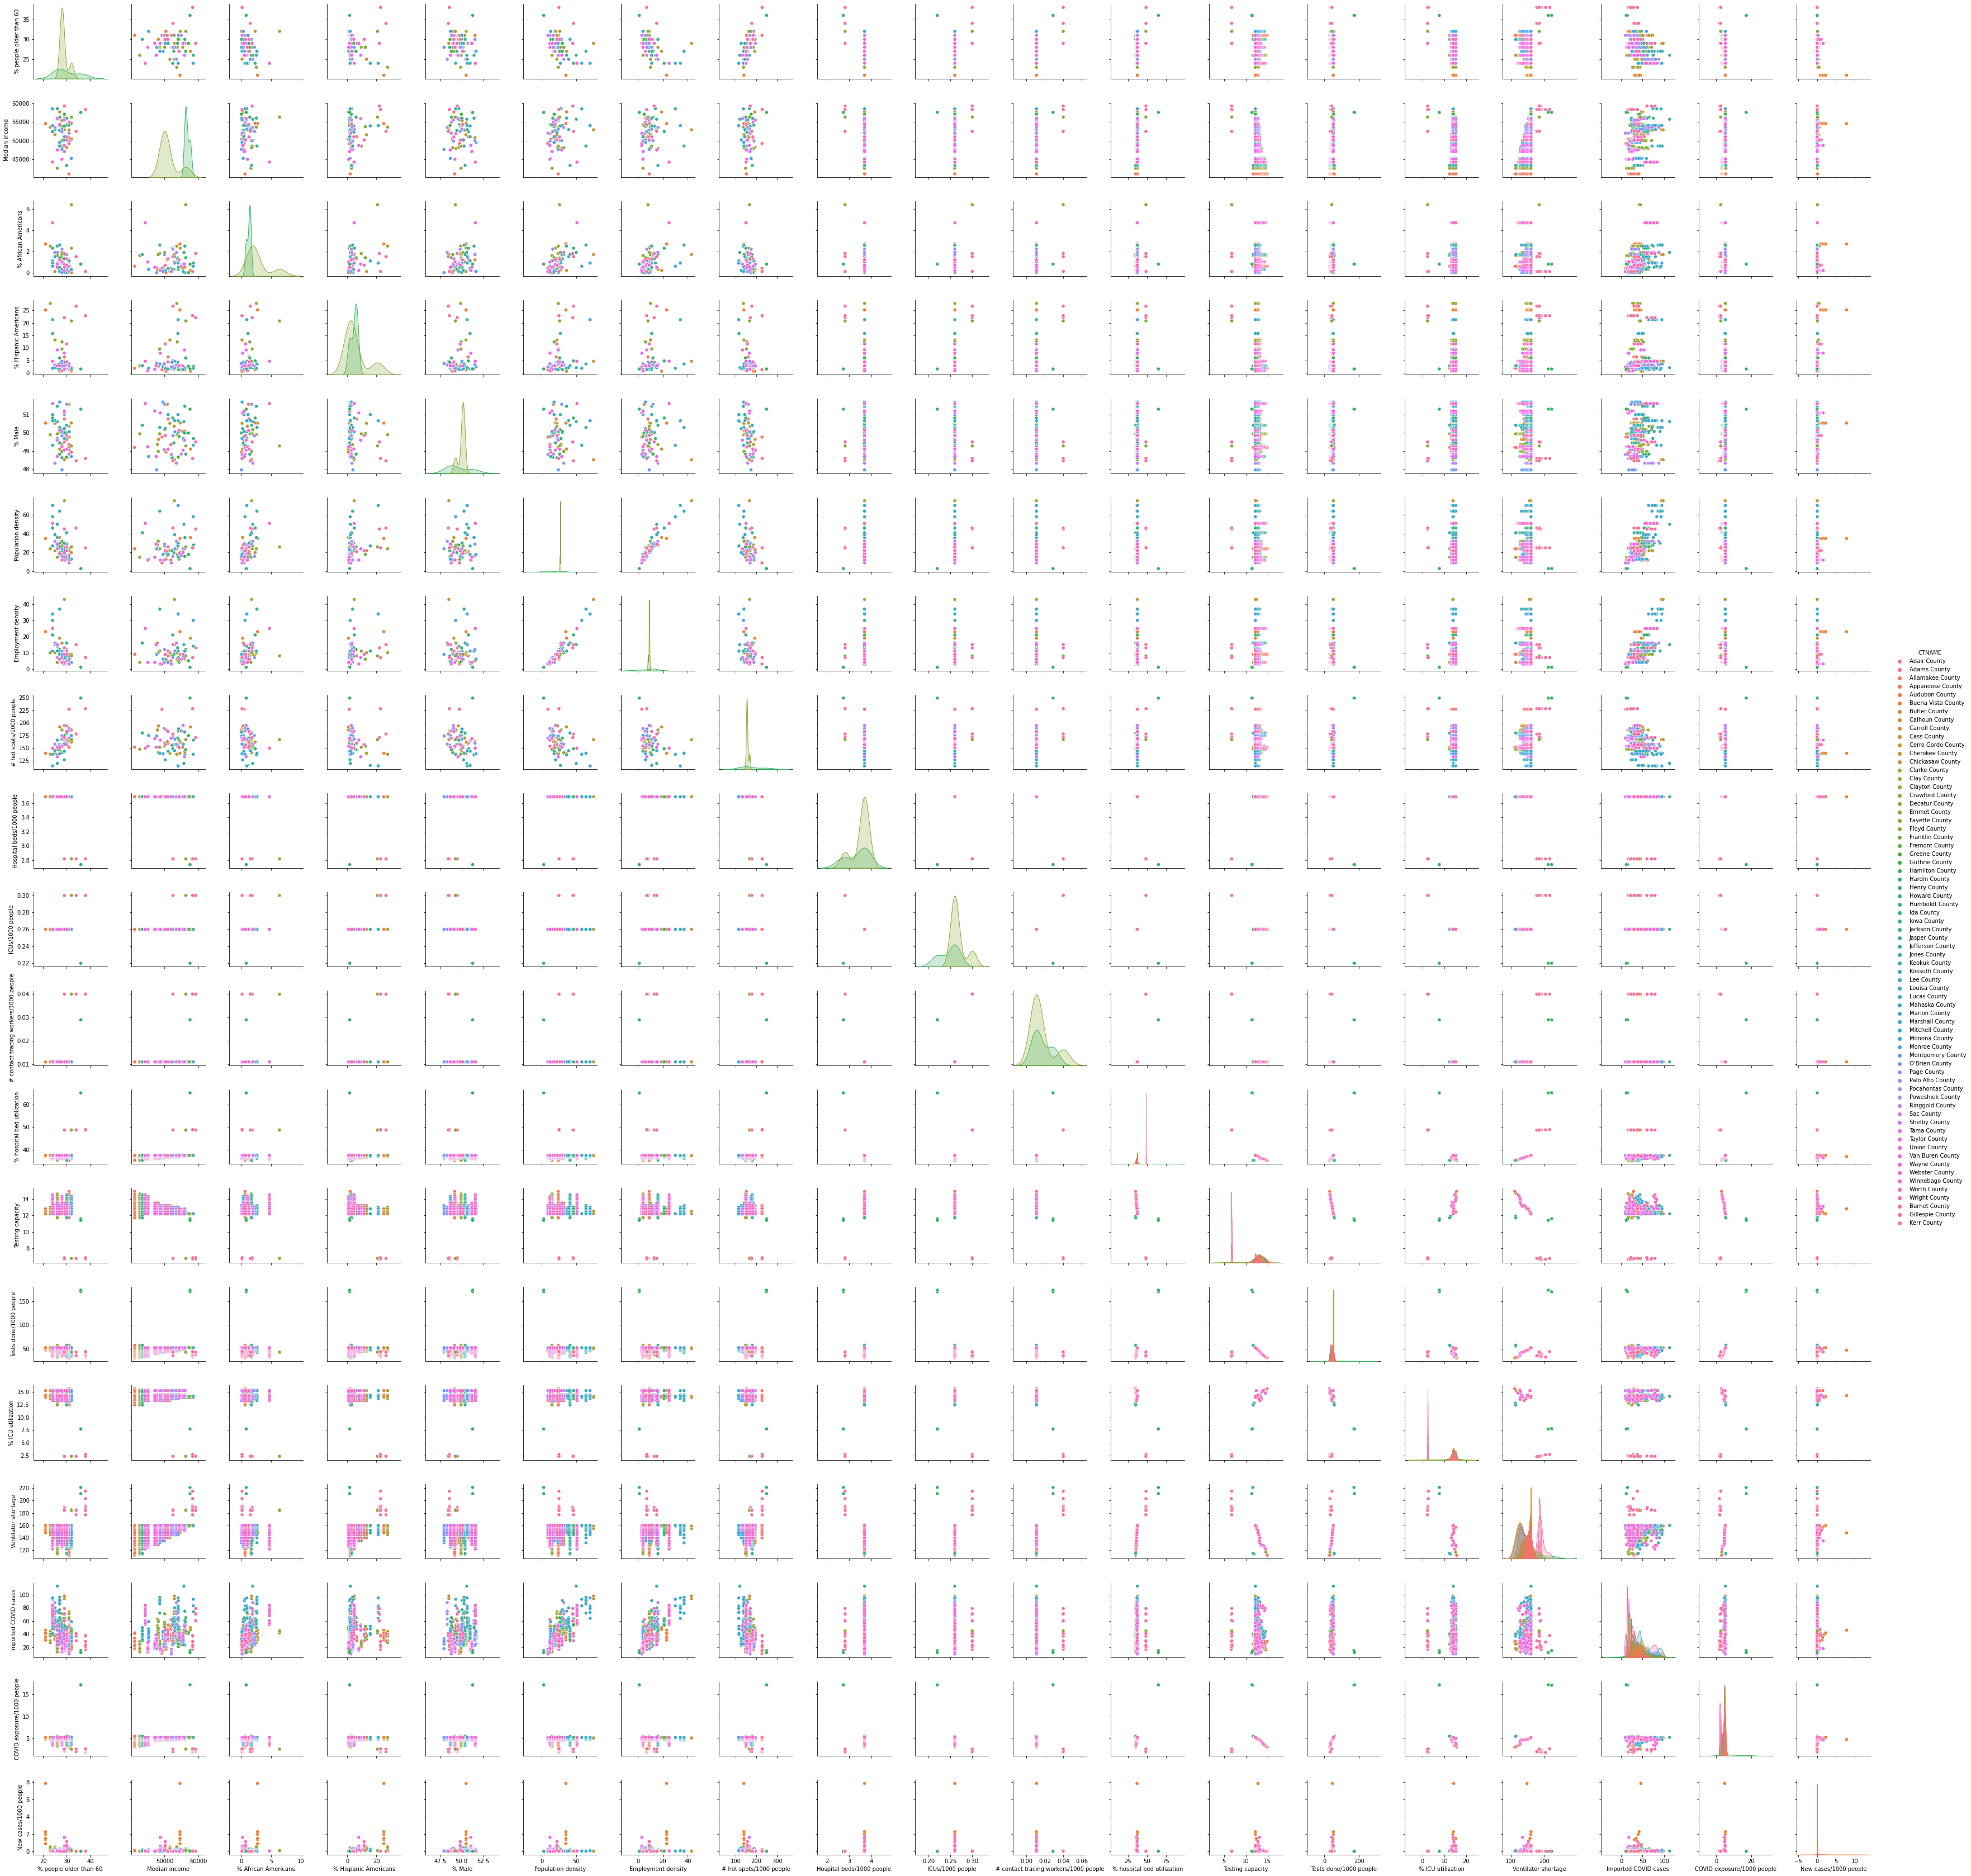

In [121]:
# pairplot with hue day 
sns.pairplot(cluster_4[demographic], hue ='CTNAME') 
# to show 
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

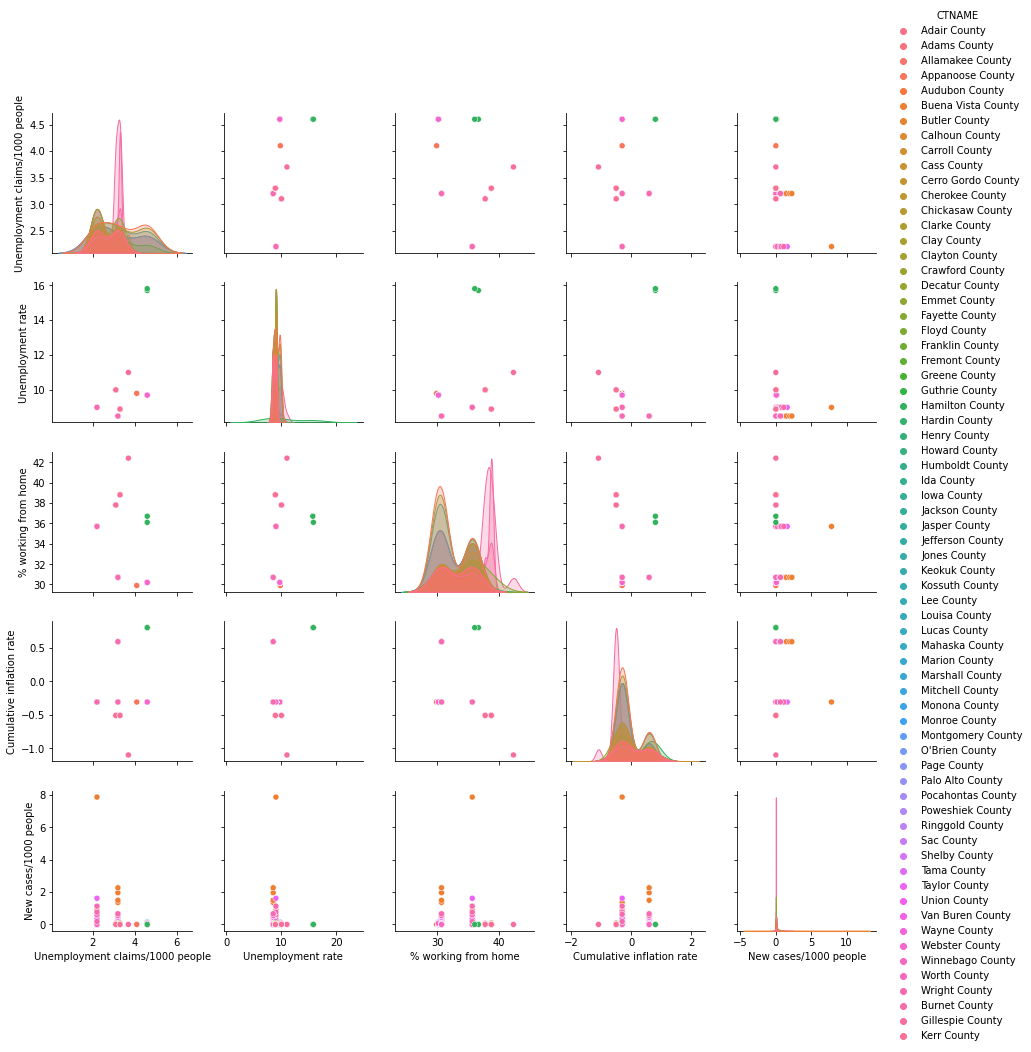

In [122]:
# pairplot with hue day 
sns.pairplot(cluster_4[employment], hue ='CTNAME') 
# to show 
plt.show()

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a1aea37f0>,
      dtype=object)

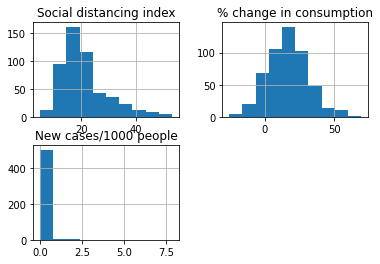

In [123]:
cluster_4[social_dist].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a1ac3fcc0>,
      dtype=object)

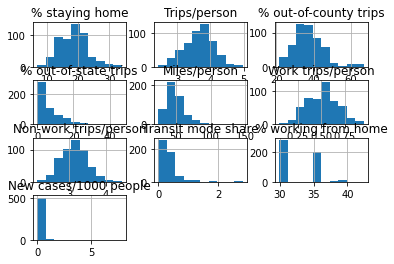

In [134]:
cluster_4[mobility].hist()

### Correlation Plot

#### 1.social_dist

In [145]:
social_dist

['CTNAME',
 'Social distancing index',
 '% change in consumption',
 'New cases/1000 people']

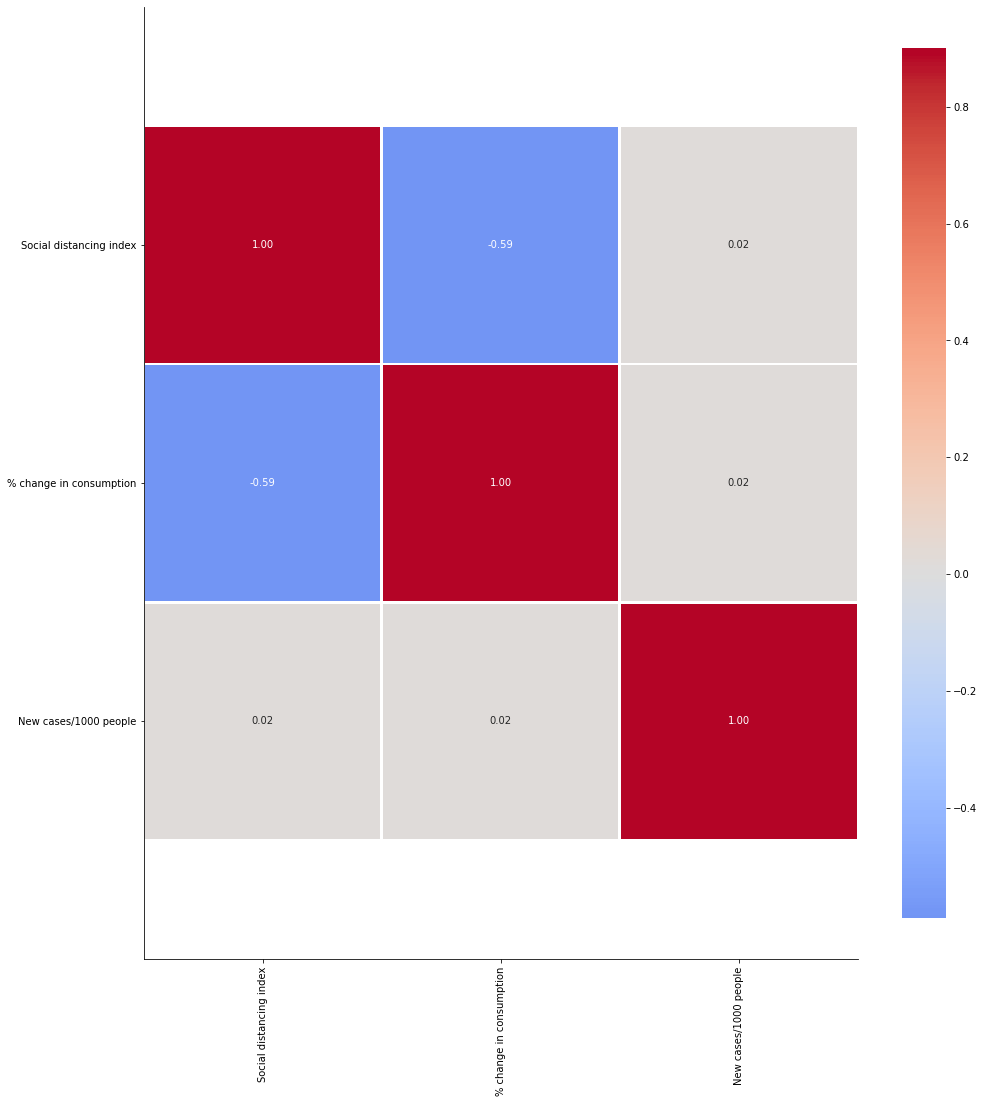

In [124]:
corr = cluster_4[social_dist].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 2.mobility

In [147]:
mobility


['CTNAME',
 '% staying home',
 'Trips/person',
 '% out-of-county trips',
 '% out-of-state trips',
 'Miles/person',
 'Work trips/person',
 'Non-work trips/person',
 'Transit mode share',
 '% working from home',
 'New cases/1000 people']

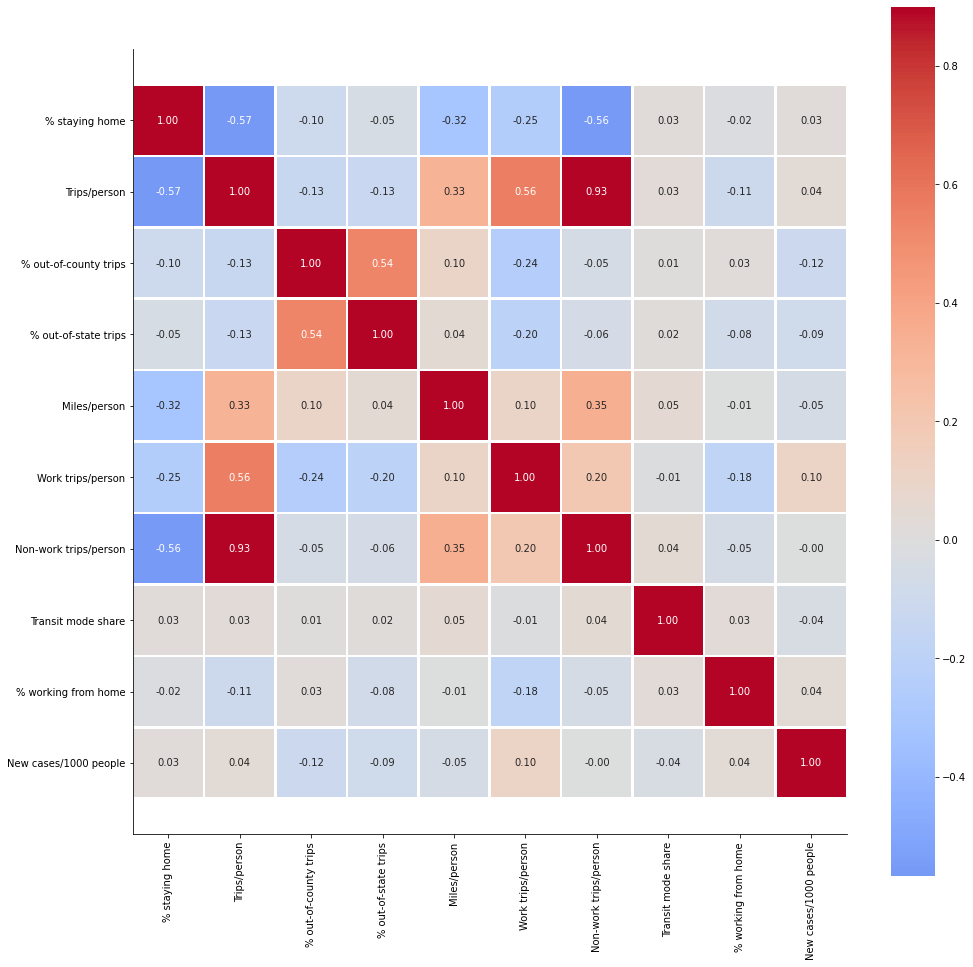

In [125]:
corr = cluster_4[mobility].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 3.demographic

In [151]:
demographic

['CTNAME',
 '% people older than 60',
 'Median income',
 '% African Americans',
 '% Hispanic Americans',
 '% Male',
 'Population density',
 'Employment density',
 '# hot spots/1000 people',
 'Hospital beds/1000 people',
 'ICUs/1000 people',
 '# contact tracing workers/1000 people',
 '% hospital bed utilization',
 'Testing capacity',
 'Tests done/1000 people',
 '% ICU utilization',
 'Ventilator shortage',
 'Imported COVID cases',
 'COVID exposure/1000 people',
 'New cases/1000 people']

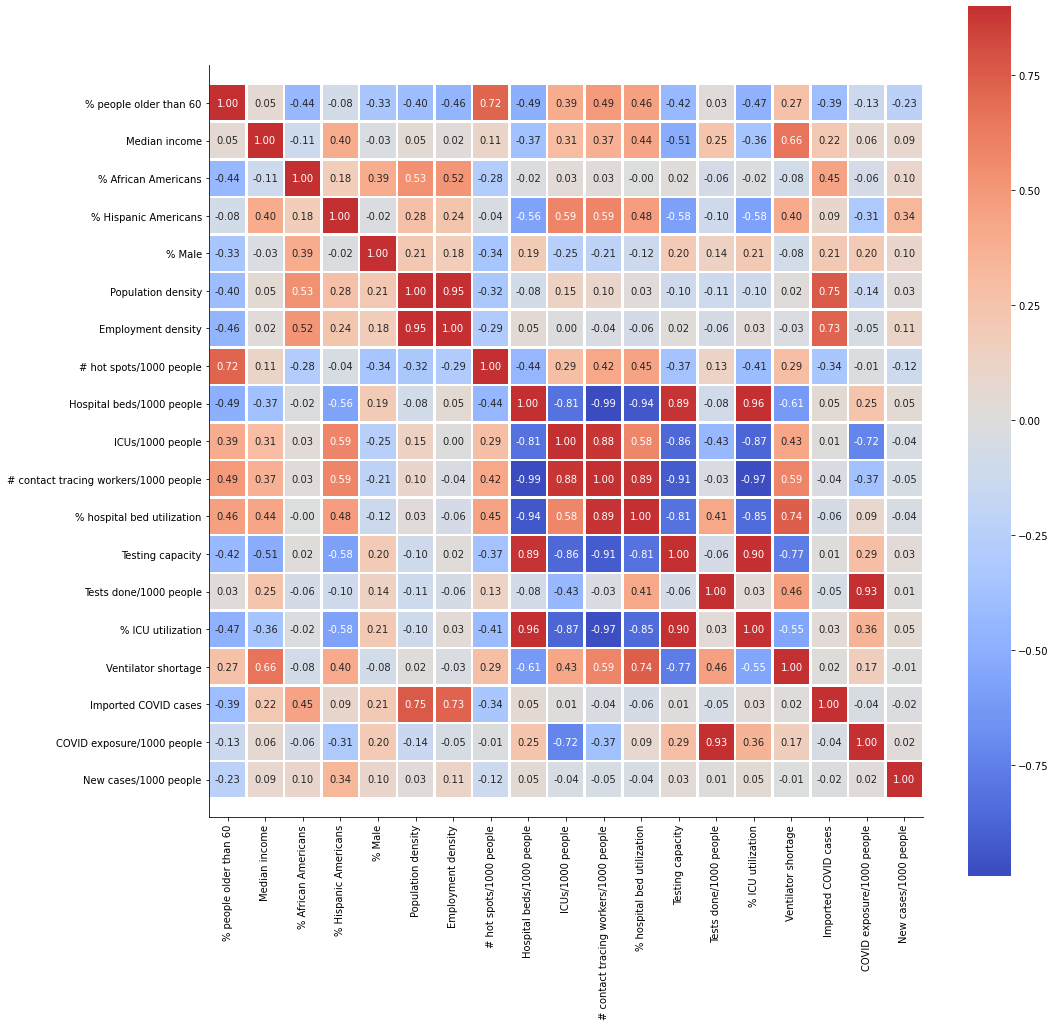

In [126]:
corr = cluster_4[demographic].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 4.employment

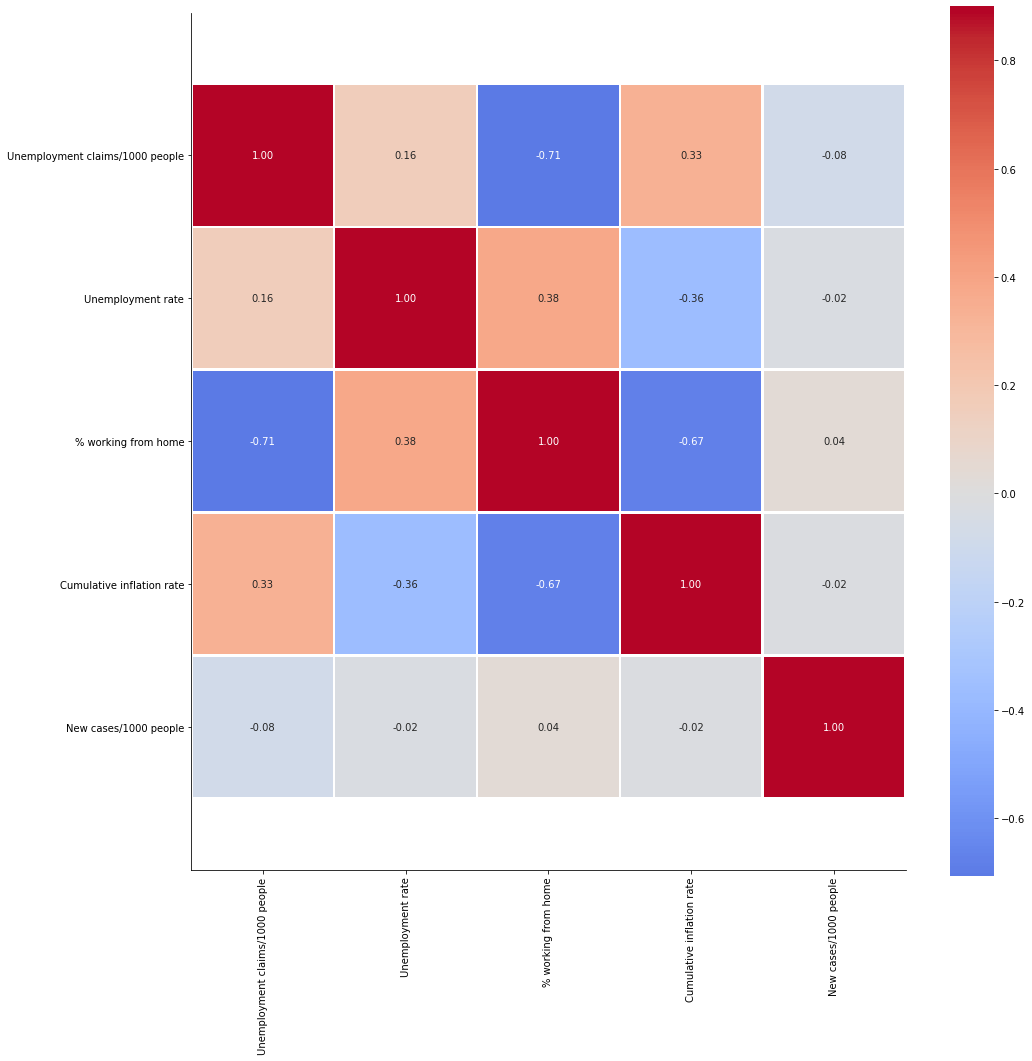

In [127]:
corr = cluster_4[employment].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 5.Pos_columns

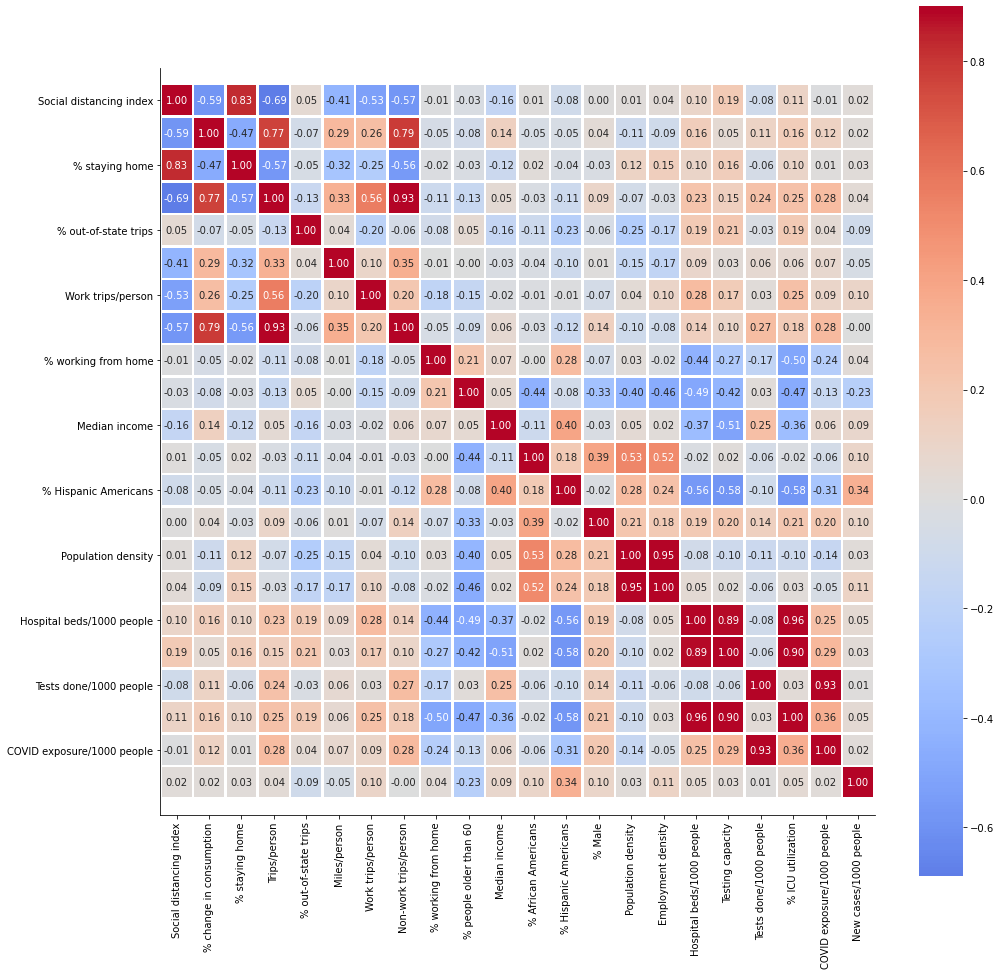

In [161]:
pos_cor_columns = ['CTNAME','Social distancing index','% change in consumption',
                   '% staying home','Trips/person','% out-of-state trips','Miles/person',
                   'Work trips/person','Non-work trips/person','% working from home',
                   '% people older than 60','Median income','% African Americans', '% Hispanic Americans','% Male','Population density',
                   'Employment density','Hospital beds/1000 people','Testing capacity','Tests done/1000 people',
                   '% ICU utilization','COVID exposure/1000 people',
                    'New cases/1000 people']
corr = cluster_4[pos_cor_columns].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

## 3.cluster_0_0_1_0_0



### Different Analysis

In [28]:
maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_0_0_1_0_0']['New cases/1000 people'].shape

(3317,)

In [29]:
cluster_0_0_1_0_0= maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_0_0_1_0_0']
cluster_0_0_1_0_0.reset_index(drop=True)

State Postal Code  STFIPS  ...  COVID death rate cluster      cluster_label
0      Iowa          IA      19  ...              4.01       0  cluster_0_0_1_0_0
1      Iowa          IA      19  ...              4.05       0  cluster_0_0_1_0_0
2      Iowa          IA      19  ...              3.93       0  cluster_0_0_1_0_0
3      Iowa          IA      19  ...              3.91       0  cluster_0_0_1_0_0
4      Iowa          IA      19  ...              3.89       0  cluster_0_0_1_0_0
...     ...         ...     ...  ...               ...     ...                ...
3312  Texas          TX      48  ...              2.71       0  cluster_0_0_1_0_0
3313  Texas          TX      48  ...              2.53       0  cluster_0_0_1_0_0
3314  Texas          TX      48  ...              2.46       0  cluster_0_0_1_0_0
3315  Texas          TX      48  ...              2.41       0  cluster_0_0_1_0_0
3316  Texas          TX      48  ...              2.84       0  cluster_0_0_1_0_0

[3317 rows x 47 columns]

### States

In [30]:
#states of cluster one

cluster_0_0_1_0_0.State.unique()


array(['Iowa', 'Texas'], dtype=object)

In [31]:
cluster_0_0_1_0_0.CTNAME.nunique()

91

In [32]:
#states of cluster one

cluster_0_0_1_0_0.CTNAME.unique()

array(['Adair County', 'Adams County', 'Allamakee County',
       'Appanoose County', 'Audubon County', 'Benton County',
       'Boone County', 'Bremer County', 'Buchanan County',
       'Buena Vista County', 'Butler County', 'Calhoun County',
       'Carroll County', 'Cass County', 'Cedar County',
       'Cerro Gordo County', 'Cherokee County', 'Chickasaw County',
       'Clarke County', 'Clay County', 'Clayton County', 'Clinton County',
       'Crawford County', 'Davis County', 'Decatur County',
       'Delaware County', 'Des Moines County', 'Dickinson County',
       'Emmet County', 'Fayette County', 'Floyd County',
       'Franklin County', 'Fremont County', 'Greene County',
       'Grundy County', 'Guthrie County', 'Hamilton County',
       'Hancock County', 'Hardin County', 'Harrison County',
       'Henry County', 'Howard County', 'Humboldt County', 'Ida County',
       'Iowa County', 'Jackson County', 'Jasper County',
       'Jefferson County', 'Jones County', 'Keokuk County',


In [33]:
#min max of new cases by each county of cluster

cluster_0_0_1_0_0.groupby(['CTNAME']).agg({'New cases/1000 people': ['mean', 'min', 'max']})

New cases/1000 people             
                                   mean  min     max
CTNAME                                              
Adair County                   0.033714  0.0  0.0944
Adams County                   0.043305  0.0  0.2743
Allamakee County               0.040368  0.0  0.2892
Appanoose County               0.020709  0.0  0.0536
Audubon County                 0.032582  0.0  0.1816
...                                 ...  ...     ...
Webster County                 0.012420  0.0  0.0276
Winnebago County               0.028449  0.0  0.0951
Winneshiek County              0.011086  0.0  0.0499
Worth County                   0.021233  0.0  0.0894
Wright County                  0.491581  0.0  1.6023

[91 rows x 3 columns]

In [34]:
cluster_0_0_1_0_0.describe().T

count  ...           max
STFIPS                                 3317.0  ...     48.000000
CTFIPS                                 3317.0  ...  48269.000000
Social distancing index                3317.0  ...     62.000000
% staying home                         3317.0  ...     46.000000
Trips/person                           3317.0  ...      5.070000
% out-of-county trips                  3317.0  ...     70.800000
% out-of-state trips                   3317.0  ...     50.200000
Miles/person                           3317.0  ...    269.600000
Work trips/person                      3317.0  ...      1.140000
Non-work trips/person                  3317.0  ...      4.630000
New COVID cases                        3317.0  ...    430.000000
Population                             3317.0  ...  46518.000000
% change in consumption                3317.0  ...     76.700000
Transit mode share                     3317.0  ...      4.100000
% people older than 60                 3317.0  ...     33.000000
Median income                          3317.0  ...  82390.000000
% African Americans                    3317.0  ...      8.700000
% Hispanic Americans                   3317.0  ...     27.800000
% Male                                 3317.0  ...     51.750000
Population density                     3317.0  ...     96.000000
Employment density                     3317.0  ...     53.000000
# hot spots/1000 people                3317.0  ...    227.000000
Hospital beds/1000 people              3317.0  ...      3.690000
ICUs/1000 people                       3317.0  ...      0.300000
# contact tracing workers/1000 people  3317.0  ...      0.040000
New cases/1000 people                  3317.0  ...      7.698500
Active cases/1000 people               3317.0  ...      4.040000
#days: decreasing COVID cases          3317.0  ...    137.000000
% hospital bed utilization             3317.0  ...     48.991719
Testing capacity                       3317.0  ...     18.600000
Tests done/1000 people                 3317.0  ...     81.950000
% ICU utilization                      3317.0  ...     20.020000
Ventilator shortage                    3317.0  ...    231.000000
Imported COVID cases                   3317.0  ...    126.000000
COVID exposure/1000 people             3317.0  ...      7.250000
#days: decreasing ILI cases            3317.0  ...    133.000000
Unemployment claims/1000 people        3317.0  ...      7.800000
Unemployment rate                      3317.0  ...     10.700000
% working from home                    3317.0  ...     38.800000
Cumulative inflation rate              3317.0  ...      0.590000
COVID death rate                       3317.0  ...      4.670000
cluster                                3317.0  ...      0.000000

[42 rows x 8 columns]

In [35]:
## Min value of all column

cluster_0_0_1_0_0.min(axis=0) # will return min value of each column

State                                                 Iowa
Postal Code                                             IA
STFIPS                                                  19
CTFIPS                                               19001
CTNAME                                        Adair County
Social distancing index                                  2
% staying home                                           0
Trips/person                                          1.96
% out-of-county trips                                 21.4
% out-of-state trips                                     0
Miles/person                                          20.6
Work trips/person                                     0.06
Non-work trips/person                                 1.69
New COVID cases                                          0
Population                                             277
% change in consumption                              -32.1
date                                            2020-04-

In [36]:
## Max value of all column

cluster_0_0_1_0_0.max(axis=0) # will return max value of each column

State                                                Texas
Postal Code                                             TX
STFIPS                                                  48
CTFIPS                                               48269
CTNAME                                       Wright County
Social distancing index                                 62
% staying home                                          46
Trips/person                                          5.07
% out-of-county trips                                 70.8
% out-of-state trips                                  50.2
Miles/person                                         269.6
Work trips/person                                     1.14
Non-work trips/person                                 4.63
New COVID cases                                        430
Population                                           46518
% change in consumption                               76.7
date                                            2020-06-

### Group Columns

In [37]:
cluster_0_0_1_0_0.columns

Index(['State', 'Postal Code', 'STFIPS', 'CTFIPS', 'CTNAME',
       'Social distancing index', '% staying home', 'Trips/person',
       '% out-of-county trips', '% out-of-state trips', 'Miles/person',
       'Work trips/person', 'Non-work trips/person', 'New COVID cases',
       'Population', '% change in consumption', 'date', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people', 'New cases/1000 people',
       'Active cases/1000 people', '#days: decreasing COVID cases',
       '% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 p

In [38]:
filter_col= ['Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','% change in consumption','Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

social_dist= ['CTNAME','Social distancing index','% change in consumption', 'New cases/1000 people']

mobility = ['CTNAME','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','Transit mode share',
       '% working from home', 'New cases/1000 people']

demographic = ['CTNAME','% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density','# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people','New cases/1000 people']

employment = ['CTNAME','Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

### Correlation Plot

#### 1.social_dist

In [39]:
social_dist

['CTNAME',
 'Social distancing index',
 '% change in consumption',
 'New cases/1000 people']

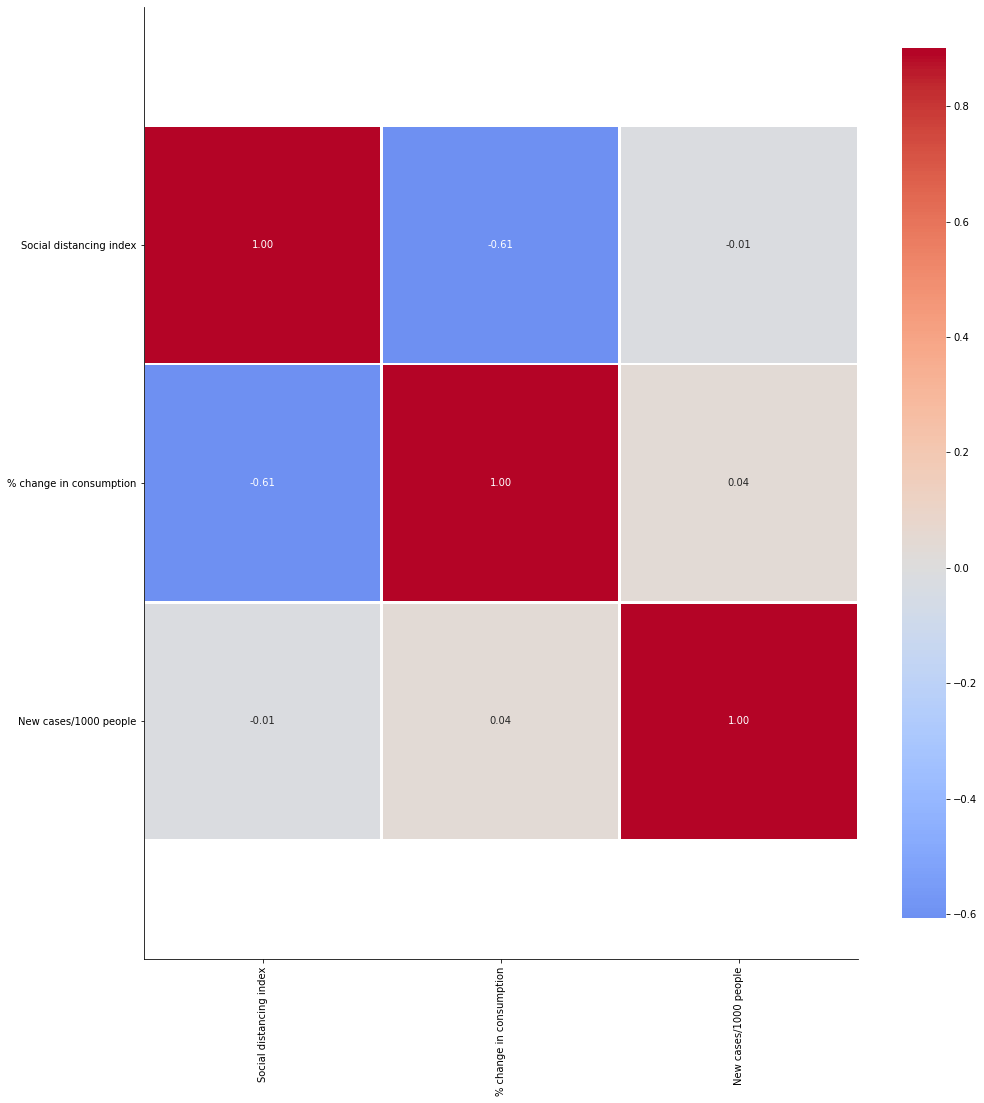

In [40]:
corr = cluster_0_0_1_0_0[social_dist].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 2.mobility

In [41]:
mobility


['CTNAME',
 '% staying home',
 'Trips/person',
 '% out-of-county trips',
 '% out-of-state trips',
 'Miles/person',
 'Work trips/person',
 'Non-work trips/person',
 'Transit mode share',
 '% working from home',
 'New cases/1000 people']

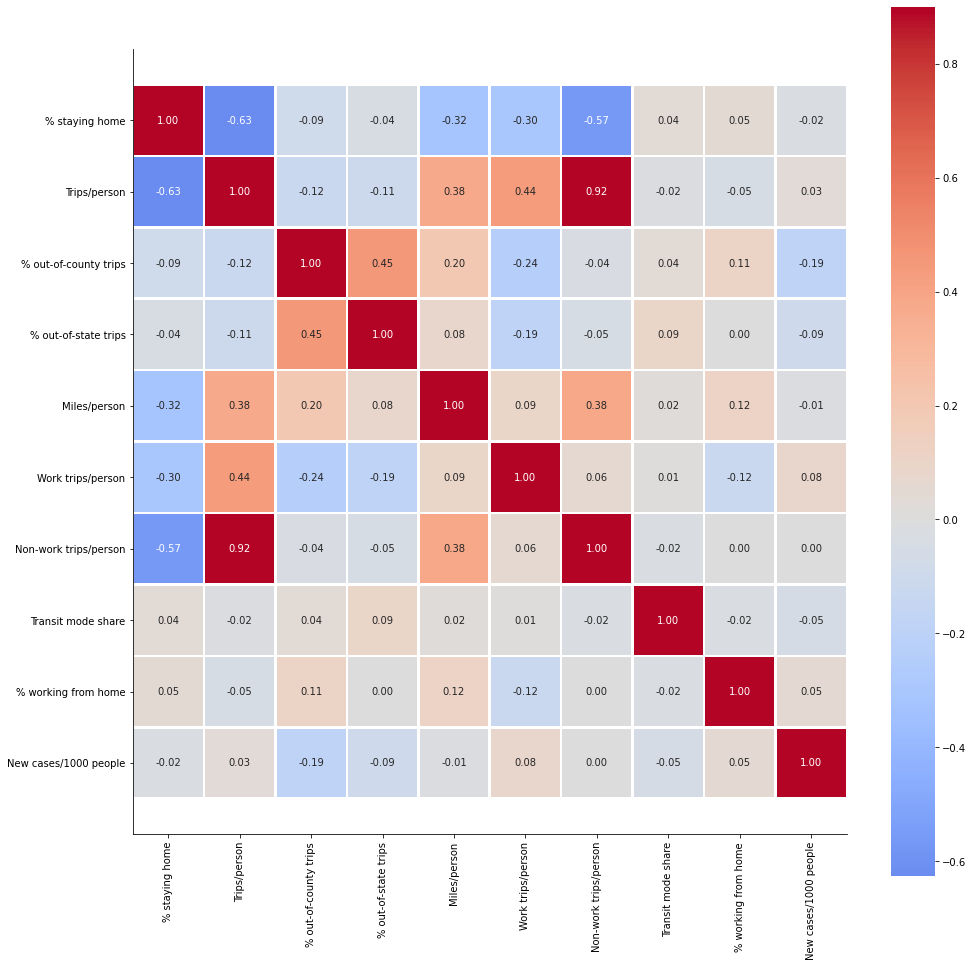

In [42]:
corr = cluster_0_0_1_0_0[mobility].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 3.demographic

In [43]:
demographic

['CTNAME',
 '% people older than 60',
 'Median income',
 '% African Americans',
 '% Hispanic Americans',
 '% Male',
 'Population density',
 'Employment density',
 '# hot spots/1000 people',
 'Hospital beds/1000 people',
 'ICUs/1000 people',
 '# contact tracing workers/1000 people',
 '% hospital bed utilization',
 'Testing capacity',
 'Tests done/1000 people',
 '% ICU utilization',
 'Ventilator shortage',
 'Imported COVID cases',
 'COVID exposure/1000 people',
 'New cases/1000 people']

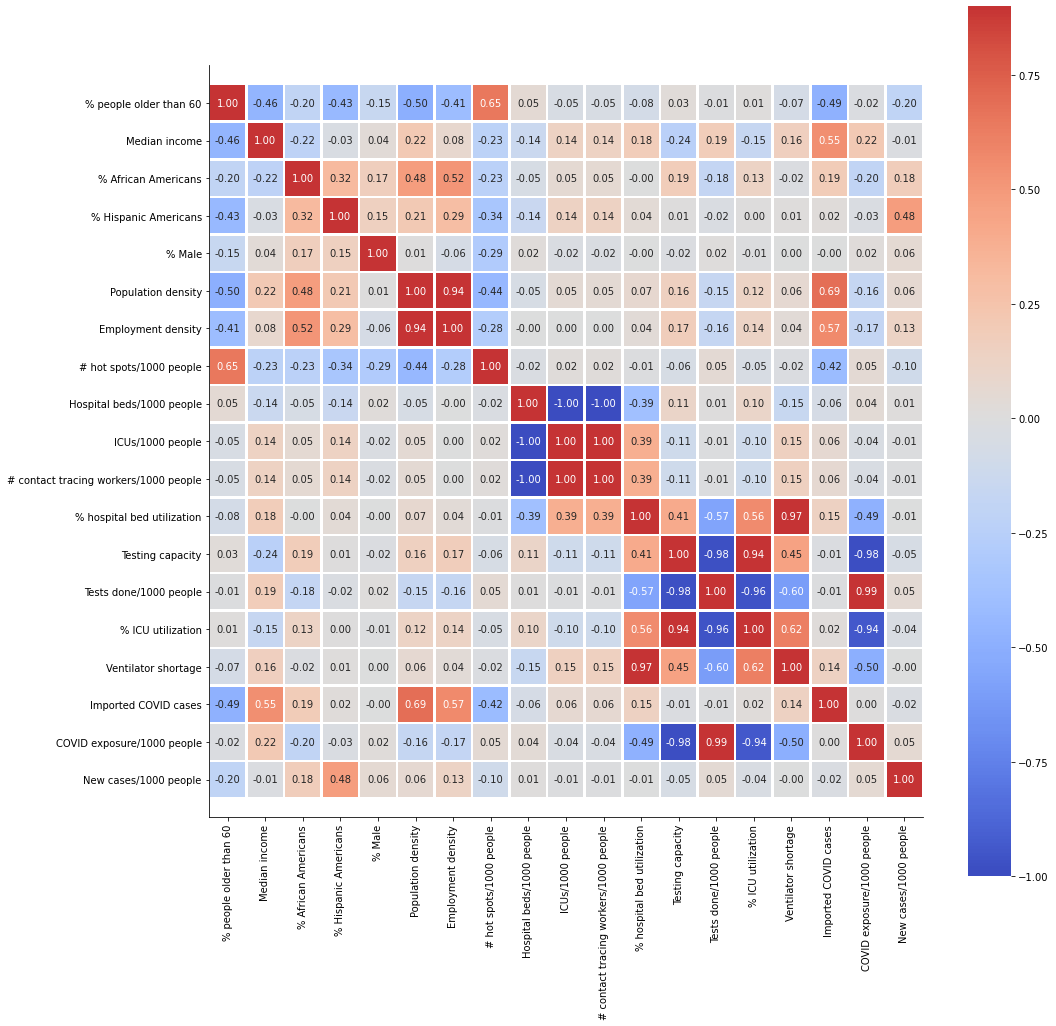

In [44]:
corr = cluster_0_0_1_0_0[demographic].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 4.employment

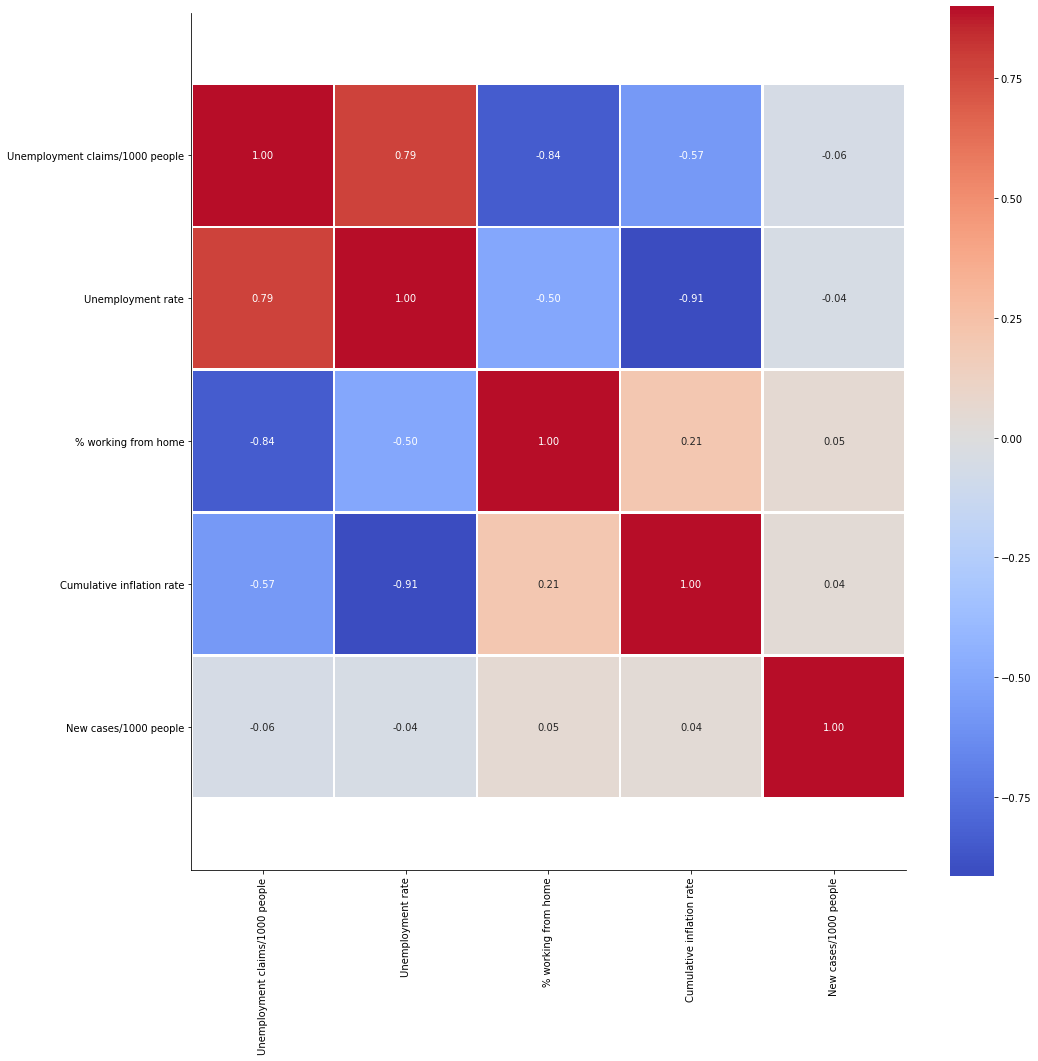

In [45]:
corr = cluster_0_0_1_0_0[employment].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 5.Pos_columns

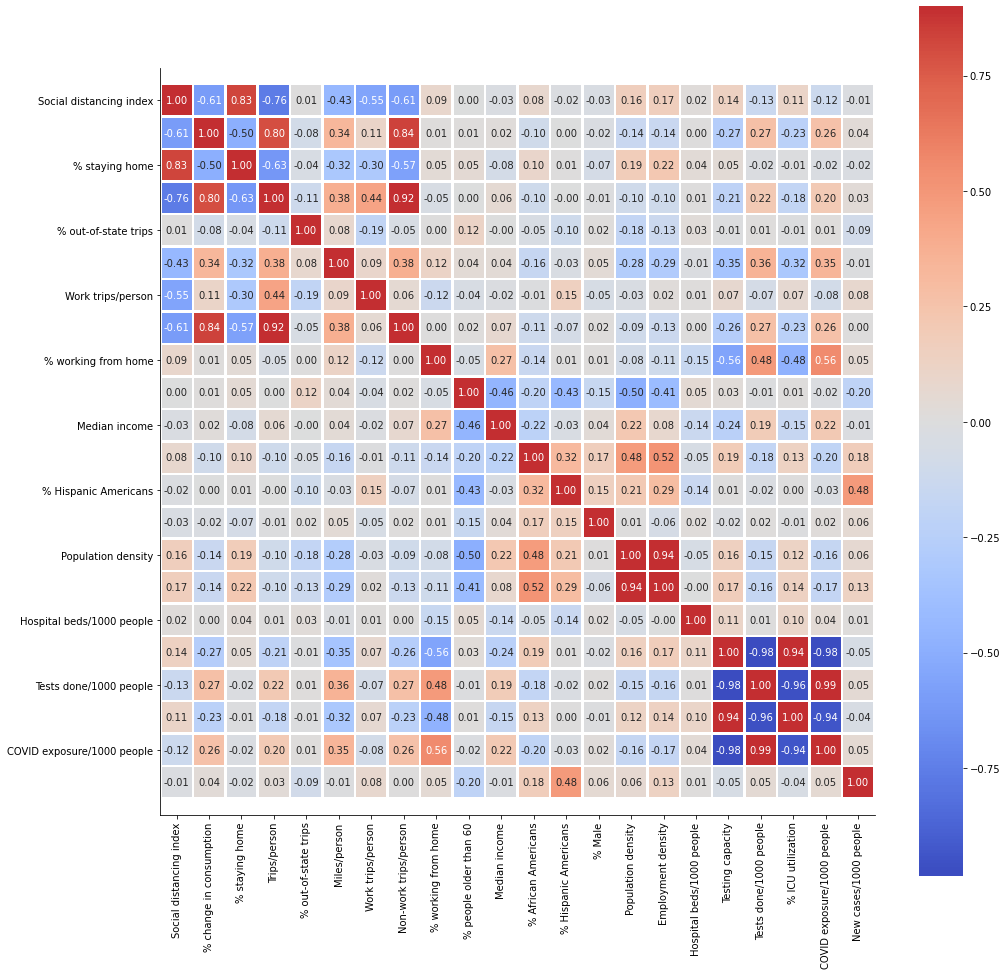

In [46]:
pos_cor_columns = ['CTNAME','Social distancing index','% change in consumption',
                   '% staying home','Trips/person','% out-of-state trips','Miles/person',
                   'Work trips/person','Non-work trips/person','% working from home',
                   '% people older than 60','Median income','% African Americans', '% Hispanic Americans','% Male','Population density',
                   'Employment density','Hospital beds/1000 people','Testing capacity','Tests done/1000 people',
                   '% ICU utilization','COVID exposure/1000 people',
                    'New cases/1000 people']
corr = cluster_0_0_1_0_0[pos_cor_columns].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

## 4.cluster_4_0_2



### Different Analysis

In [66]:
maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_4_0_2']['New cases/1000 people'].shape

(2601,)

In [67]:
cluster_4_0_2= maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_4_0_2']
cluster_4_0_2.reset_index(drop=True)

State Postal Code  STFIPS  ...  COVID death rate cluster  cluster_label
0     New York          NY      36  ...              2.60       2  cluster_4_0_2
1     New York          NY      36  ...             17.71       2  cluster_4_0_2
2     New York          NY      36  ...             17.04       2  cluster_4_0_2
3     New York          NY      36  ...              2.60       2  cluster_4_0_2
4     New York          NY      36  ...             18.36       2  cluster_4_0_2
...        ...         ...     ...  ...               ...     ...            ...
2596     Texas          TX      48  ...              2.69       2  cluster_4_0_2
2597     Texas          TX      48  ...              2.71       2  cluster_4_0_2
2598     Texas          TX      48  ...              2.67       2  cluster_4_0_2
2599     Texas          TX      48  ...              2.62       2  cluster_4_0_2
2600     Texas          TX      48  ...              2.60       2  cluster_4_0_2

[2601 rows x 47 columns]

### States

In [68]:
#states of cluster one

cluster_4_0_2.State.unique()


array(['New York', 'Texas'], dtype=object)

In [69]:
cluster_4_0_2.CTNAME.nunique()

153

In [70]:
#states of cluster one

cluster_4_0_2.CTNAME.unique()

array(['Allegany County', 'Broome County', 'Cattaraugus County',
       'Cayuga County', 'Chautauqua County', 'Chemung County',
       'Chenango County', 'Clinton County', 'Columbia County',
       'Cortland County', 'Delaware County', 'Dutchess County',
       'Essex County', 'Franklin County', 'Fulton County',
       'Genesee County', 'Greene County', 'Hamilton County',
       'Herkimer County', 'Jefferson County', 'Lewis County',
       'Livingston County', 'Madison County', 'Monroe County',
       'Montgomery County', 'Niagara County', 'Oneida County',
       'Onondaga County', 'Ontario County', 'Orleans County',
       'Oswego County', 'Otsego County', 'Putnam County',
       'Rensselaer County', 'St. Lawrence County', 'Saratoga County',
       'Schoharie County', 'Schuyler County', 'Seneca County',
       'Steuben County', 'Sullivan County', 'Tioga County',
       'Tompkins County', 'Ulster County', 'Warren County',
       'Washington County', 'Wayne County', 'Wyoming County',
  

In [71]:
#min max of new cases by each county of cluster

cluster_4_0_2.groupby(['CTNAME']).agg({'New cases/1000 people': ['mean', 'min', 'max']})

New cases/1000 people                
                                 mean     min     max
CTNAME                                               
Allegany County              0.009567  0.0000  0.0287
Anderson County              0.194367  0.0000  0.8383
Aransas County               0.080944  0.0000  0.1681
Bailey County                0.239000  0.0000  0.5218
Baylor County                0.098389  0.0000  0.2792
...                               ...     ...     ...
Wyoming County               0.012450  0.0083  0.0166
Yates County                 0.049200  0.0000  0.0805
Young County                 0.223983  0.0185  0.5911
Zapata County                0.174514  0.0000  0.5168
Zavala County                0.211948  0.0000  0.9180

[153 rows x 3 columns]

In [72]:
cluster_4_0_2.describe().T

count  ...            max
STFIPS                                 2601.0  ...      48.000000
CTFIPS                                 2601.0  ...   48507.000000
Social distancing index                2601.0  ...      79.000000
% staying home                         2601.0  ...      51.000000
Trips/person                           2601.0  ...       7.380000
% out-of-county trips                  2601.0  ...      92.400000
% out-of-state trips                   2601.0  ...      42.200000
Miles/person                           2601.0  ...     177.200000
Work trips/person                      2601.0  ...       1.910000
Non-work trips/person                  2601.0  ...       6.830000
New COVID cases                        2601.0  ...     490.000000
Population                             2601.0  ...  742474.000000
% change in consumption                2601.0  ...     169.000000
Transit mode share                     2601.0  ...       8.160000
% people older than 60                 2601.0  ...      41.000000
Median income                          2601.0  ...  102186.000000
% African Americans                    2601.0  ...      24.700000
% Hispanic Americans                   2601.0  ...      99.100000
% Male                                 2601.0  ...      66.190000
Population density                     2601.0  ...     576.000000
Employment density                     2601.0  ...     332.000000
# hot spots/1000 people                2601.0  ...     249.000000
Hospital beds/1000 people              2601.0  ...       2.820000
ICUs/1000 people                       2601.0  ...       0.300000
# contact tracing workers/1000 people  2601.0  ...       0.040000
New cases/1000 people                  2601.0  ...       5.750400
Active cases/1000 people               2601.0  ...      11.450000
#days: decreasing COVID cases          2601.0  ...      65.000000
% hospital bed utilization             2601.0  ...     104.213416
Testing capacity                       2601.0  ...      40.900000
Tests done/1000 people                 2601.0  ...     193.370000
% ICU utilization                      2601.0  ...     120.860000
Ventilator shortage                    2601.0  ...    5670.000000
Imported COVID cases                   2601.0  ...     678.000000
COVID exposure/1000 people             2601.0  ...      19.540000
#days: decreasing ILI cases            2601.0  ...     182.000000
Unemployment claims/1000 people        2601.0  ...      20.300000
Unemployment rate                      2601.0  ...      15.100000
% working from home                    2601.0  ...      40.300000
Cumulative inflation rate              2601.0  ...       0.800000
COVID death rate                       2601.0  ...      20.580000
cluster                                2601.0  ...       2.000000

[42 rows x 8 columns]

In [73]:
## Min value of all column

cluster_4_0_2.min(axis=0) # will return min value of each column

State                                           New York
Postal Code                                           NY
STFIPS                                                36
CTFIPS                                             36003
CTNAME                                   Allegany County
Social distancing index                                6
% staying home                                         0
Trips/person                                        1.52
% out-of-county trips                                3.9
% out-of-state trips                                   0
Miles/person                                        10.2
Work trips/person                                      0
Non-work trips/person                               0.42
New COVID cases                                        0
Population                                           442
% change in consumption                            -77.7
date                                          2020-03-28
Transit mode share             

In [74]:
## Max value of all column

cluster_4_0_2.max(axis=0) # will return max value of each column

State                                            Texas
Postal Code                                         TX
STFIPS                                              48
CTFIPS                                           48507
CTNAME                                   Zavala County
Social distancing index                             79
% staying home                                      51
Trips/person                                      7.38
% out-of-county trips                             92.4
% out-of-state trips                              42.2
Miles/person                                     177.2
Work trips/person                                 1.91
Non-work trips/person                             6.83
New COVID cases                                    490
Population                                      742474
% change in consumption                            169
date                                        2020-09-15
Transit mode share                                8.16
% people o

### Group Columns

In [75]:
cluster_4_0_2.columns

Index(['State', 'Postal Code', 'STFIPS', 'CTFIPS', 'CTNAME',
       'Social distancing index', '% staying home', 'Trips/person',
       '% out-of-county trips', '% out-of-state trips', 'Miles/person',
       'Work trips/person', 'Non-work trips/person', 'New COVID cases',
       'Population', '% change in consumption', 'date', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people', 'New cases/1000 people',
       'Active cases/1000 people', '#days: decreasing COVID cases',
       '% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 p

In [76]:
filter_col= ['Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','% change in consumption','Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

social_dist= ['CTNAME','Social distancing index','% change in consumption', 'New cases/1000 people']

mobility = ['CTNAME','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','Transit mode share',
       '% working from home', 'New cases/1000 people']

demographic = ['CTNAME','% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density','# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people','New cases/1000 people']

employment = ['CTNAME','Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

### Correlation Plot

#### 1.social_dist

In [77]:
social_dist

['CTNAME',
 'Social distancing index',
 '% change in consumption',
 'New cases/1000 people']

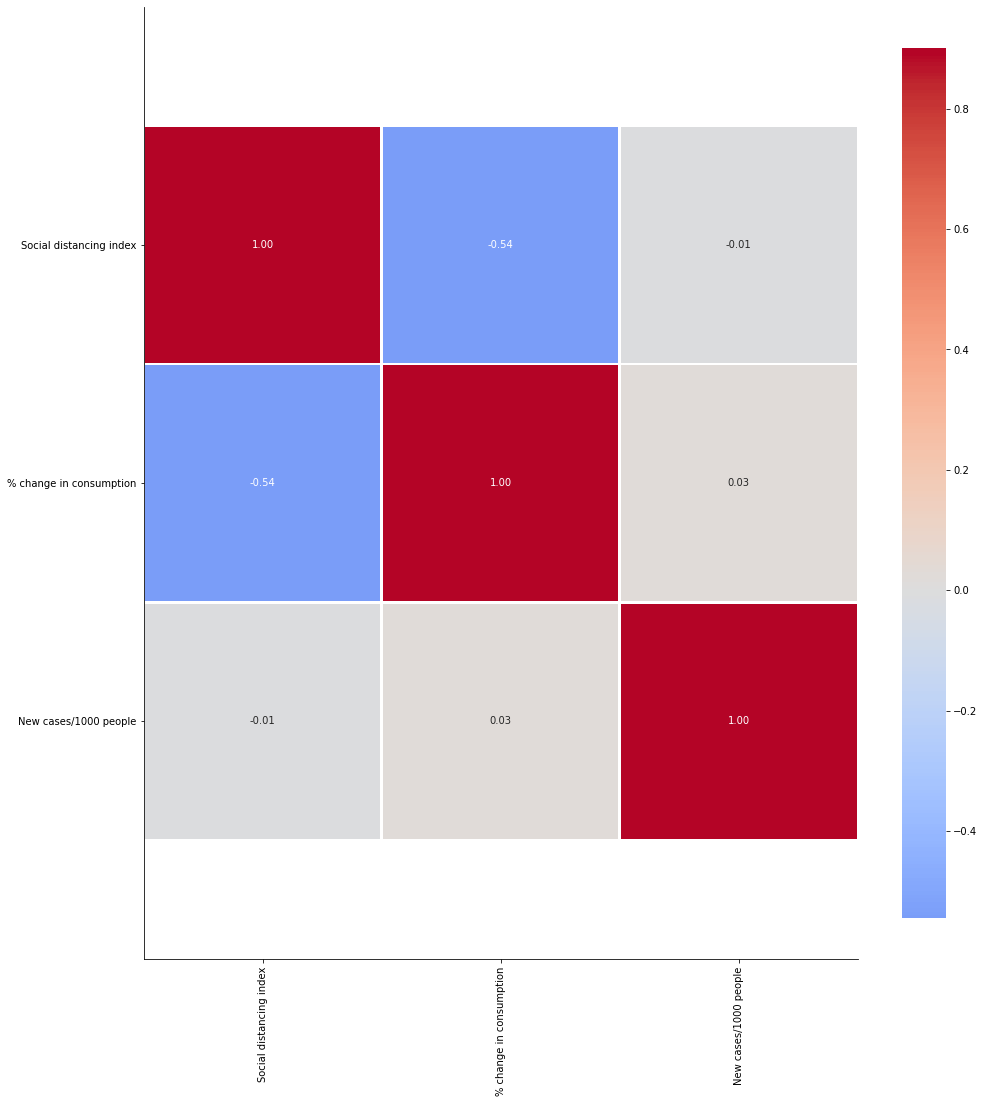

In [78]:
corr = cluster_4_0_2[social_dist].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 2.mobility

In [79]:
mobility


['CTNAME',
 '% staying home',
 'Trips/person',
 '% out-of-county trips',
 '% out-of-state trips',
 'Miles/person',
 'Work trips/person',
 'Non-work trips/person',
 'Transit mode share',
 '% working from home',
 'New cases/1000 people']

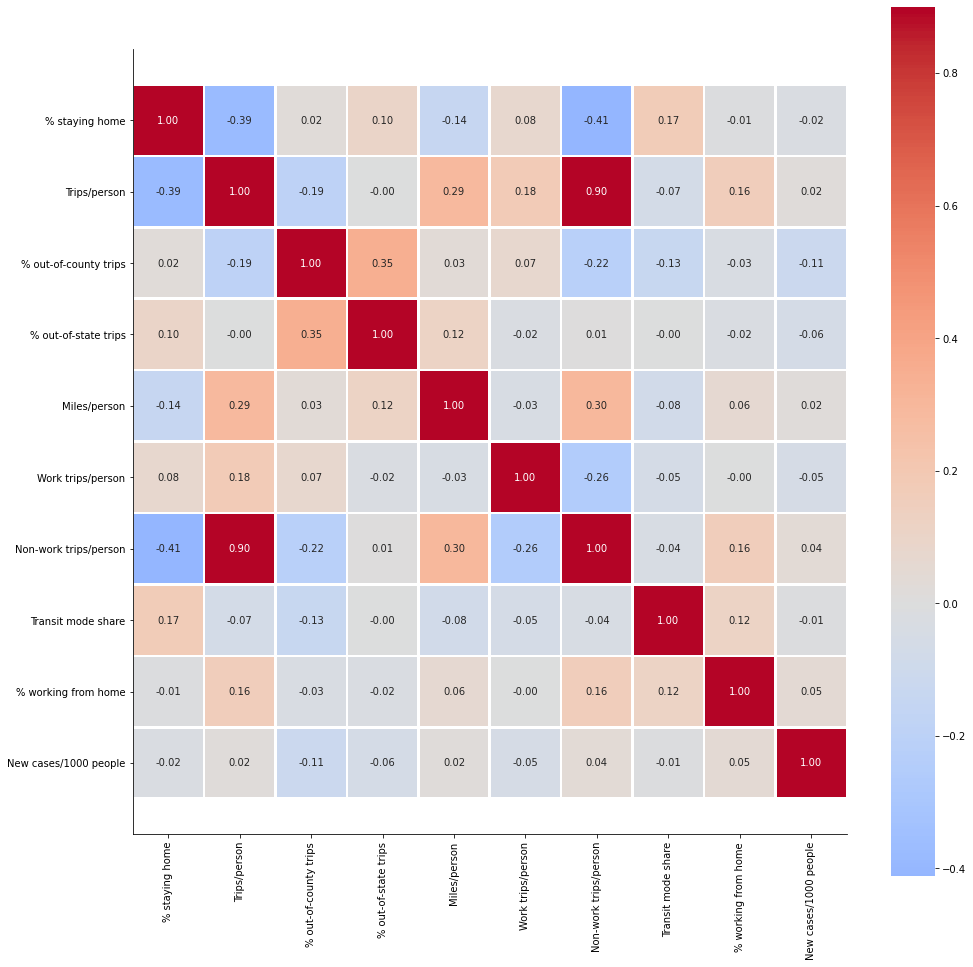

In [80]:
corr = cluster_4_0_2[mobility].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 3.demographic

In [81]:
demographic

['CTNAME',
 '% people older than 60',
 'Median income',
 '% African Americans',
 '% Hispanic Americans',
 '% Male',
 'Population density',
 'Employment density',
 '# hot spots/1000 people',
 'Hospital beds/1000 people',
 'ICUs/1000 people',
 '# contact tracing workers/1000 people',
 '% hospital bed utilization',
 'Testing capacity',
 'Tests done/1000 people',
 '% ICU utilization',
 'Ventilator shortage',
 'Imported COVID cases',
 'COVID exposure/1000 people',
 'New cases/1000 people']

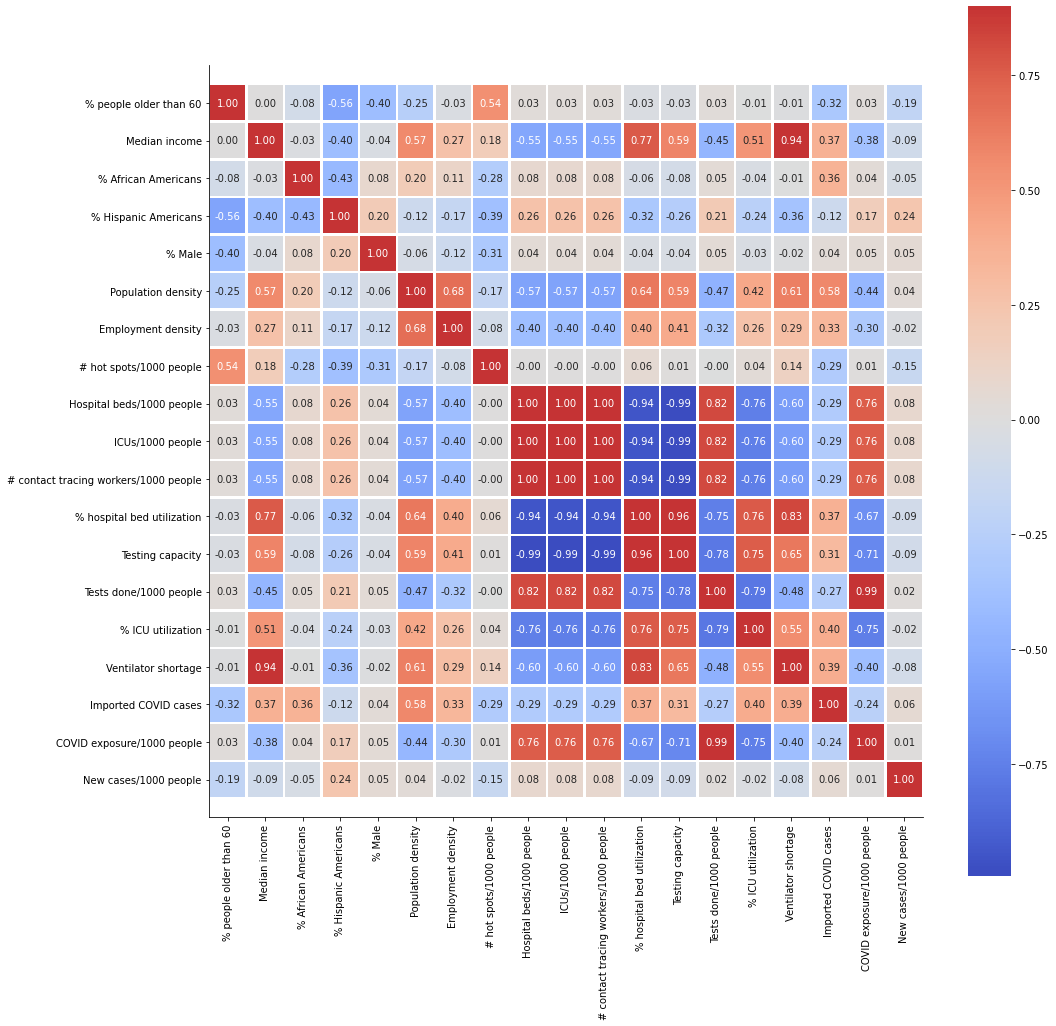

In [82]:
corr = cluster_4_0_2[demographic].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 4.employment

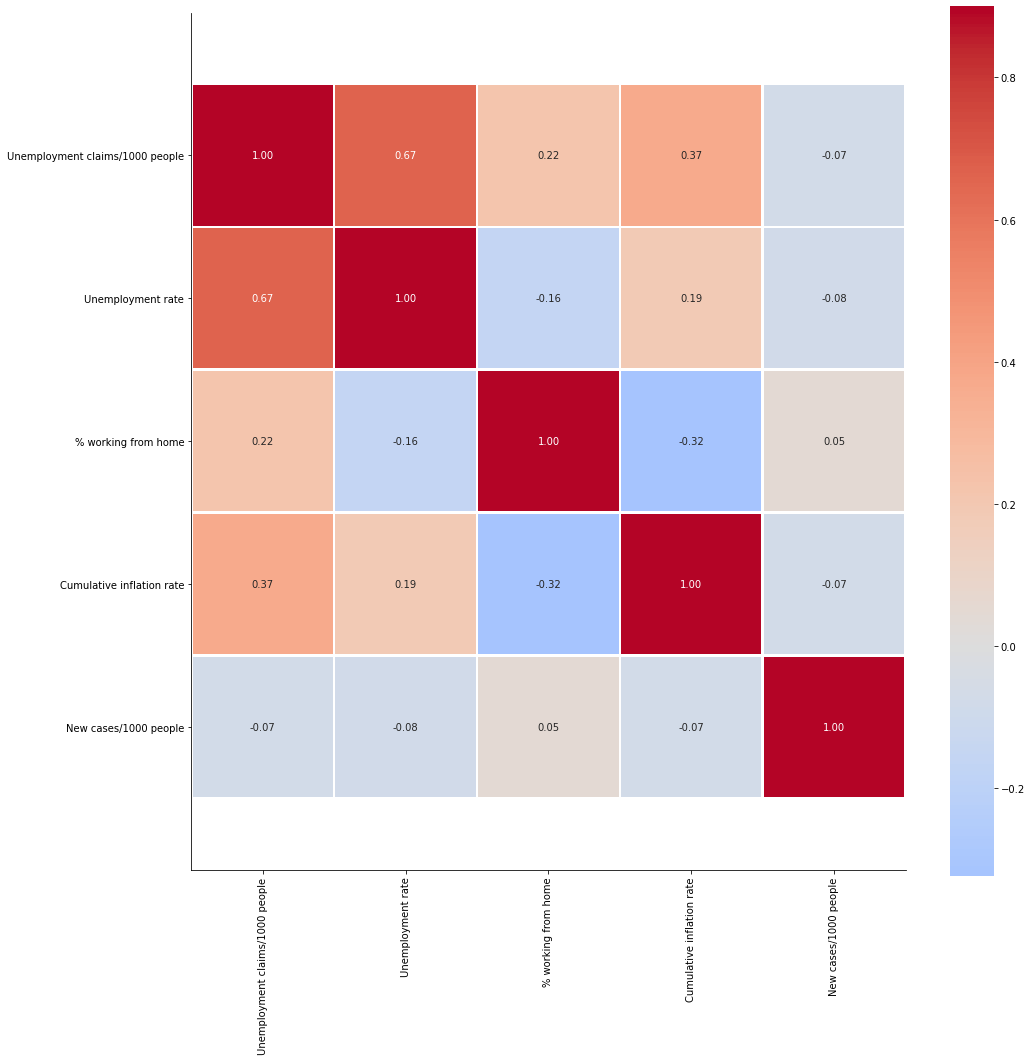

In [83]:
corr = cluster_4_0_2[employment].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 5.Pos_columns

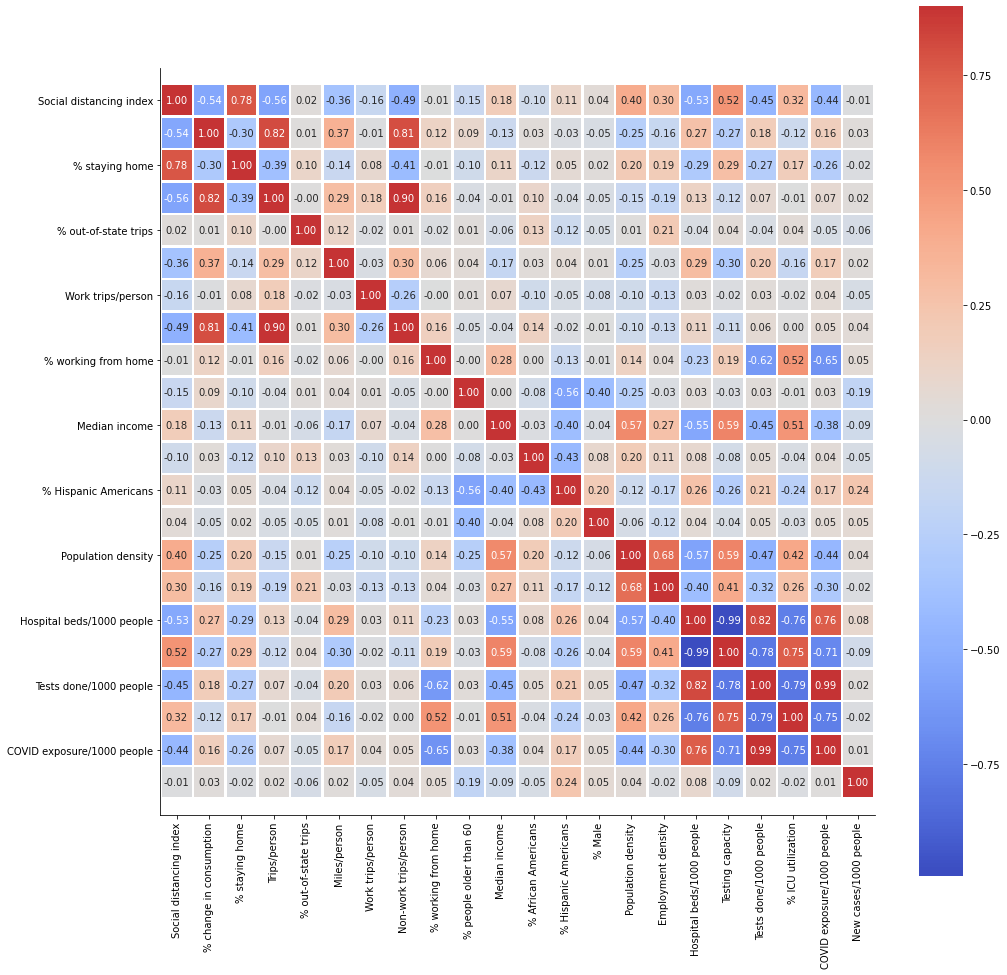

In [84]:
pos_cor_columns = ['CTNAME','Social distancing index','% change in consumption',
                   '% staying home','Trips/person','% out-of-state trips','Miles/person',
                   'Work trips/person','Non-work trips/person','% working from home',
                   '% people older than 60','Median income','% African Americans', '% Hispanic Americans','% Male','Population density',
                   'Employment density','Hospital beds/1000 people','Testing capacity','Tests done/1000 people',
                   '% ICU utilization','COVID exposure/1000 people',
                    'New cases/1000 people']
corr = cluster_4_0_2[pos_cor_columns].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

## 5.cluster_0_0_0_2



### Different Analysis

In [85]:
maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_0_0_0_2']['New cases/1000 people'].shape

(1746,)

In [86]:
cluster_0_0_0_2= maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_0_0_0_2']
cluster_0_0_0_2.reset_index(drop=True)

State Postal Code  STFIPS  ...  COVID death rate cluster    cluster_label
0     New York          NY      36  ...              9.55       2  cluster_0_0_0_2
1     New York          NY      36  ...              9.51       2  cluster_0_0_0_2
2     New York          NY      36  ...              9.44       2  cluster_0_0_0_2
3     New York          NY      36  ...              9.38       2  cluster_0_0_0_2
4     New York          NY      36  ...              9.34       2  cluster_0_0_0_2
...        ...         ...     ...  ...               ...     ...              ...
1741     Texas          TX      48  ...              1.89       2  cluster_0_0_0_2
1742     Texas          TX      48  ...              1.85       2  cluster_0_0_0_2
1743     Texas          TX      48  ...              1.79       2  cluster_0_0_0_2
1744     Texas          TX      48  ...              1.65       2  cluster_0_0_0_2
1745     Texas          TX      48  ...              1.61       2  cluster_0_0_0_2

[1746 rows x 47 columns]

### States

In [87]:
#states of cluster one

cluster_0_0_0_2.State.unique()


array(['New York', 'Texas'], dtype=object)

In [88]:
cluster_0_0_0_2.CTNAME.nunique()

135

In [89]:
#states of cluster one

cluster_0_0_0_2.CTNAME.unique()

array(['Allegany County', 'Cattaraugus County', 'Cayuga County',
       'Chautauqua County', 'Chemung County', 'Chenango County',
       'Clinton County', 'Columbia County', 'Cortland County',
       'Delaware County', 'Essex County', 'Franklin County',
       'Fulton County', 'Genesee County', 'Greene County',
       'Herkimer County', 'Jefferson County', 'Lewis County',
       'Livingston County', 'Madison County', 'Montgomery County',
       'Niagara County', 'Oneida County', 'Ontario County',
       'Orleans County', 'Oswego County', 'Otsego County',
       'Putnam County', 'Rensselaer County', 'St. Lawrence County',
       'Saratoga County', 'Schoharie County', 'Schuyler County',
       'Seneca County', 'Steuben County', 'Sullivan County',
       'Tioga County', 'Tompkins County', 'Ulster County',
       'Warren County', 'Washington County', 'Wayne County',
       'Wyoming County', 'Yates County', 'Anderson County',
       'Angelina County', 'Atascosa County', 'Austin County',
   

In [90]:
#min max of new cases by each county of cluster

cluster_0_0_0_2.groupby(['CTNAME']).agg({'New cases/1000 people': ['mean', 'min', 'max']})

New cases/1000 people                
                                 mean     min     max
CTNAME                                               
Allegany County              0.008705  0.0000  0.0215
Anderson County              1.182100  0.0000  5.1960
Angelina County              0.131182  0.0000  0.2488
Atascosa County              0.102118  0.0331  0.1789
Austin County                0.106222  0.0445  0.2112
...                               ...     ...     ...
Wilson County                0.124437  0.0796  0.2057
Wise County                  0.064261  0.0000  0.1366
Wood County                  0.039392  0.0074  0.0886
Wyoming County               0.010219  0.0000  0.0333
Yates County                 0.007735  0.0000  0.0403

[135 rows x 3 columns]

In [91]:
cluster_0_0_0_2.describe().T

count  ...            max
STFIPS                                 1746.0  ...      48.000000
CTFIPS                                 1746.0  ...   48499.000000
Social distancing index                1746.0  ...      56.000000
% staying home                         1746.0  ...      38.000000
Trips/person                           1746.0  ...       5.520000
% out-of-county trips                  1746.0  ...      70.500000
% out-of-state trips                   1746.0  ...      29.100000
Miles/person                           1746.0  ...     145.700000
Work trips/person                      1746.0  ...       1.000000
Non-work trips/person                  1746.0  ...       4.890000
New COVID cases                        1746.0  ...     618.000000
Population                             1746.0  ...  275910.000000
% change in consumption                1746.0  ...      44.900000
Transit mode share                     1746.0  ...       8.160000
% people older than 60                 1746.0  ...      46.000000
Median income                          1746.0  ...  102186.000000
% African Americans                    1746.0  ...      24.500000
% Hispanic Americans                   1746.0  ...      95.500000
% Male                                 1746.0  ...      62.880000
Population density                     1746.0  ...     402.000000
Employment density                     1746.0  ...     175.000000
# hot spots/1000 people                1746.0  ...     228.000000
Hospital beds/1000 people              1746.0  ...       2.820000
ICUs/1000 people                       1746.0  ...       0.300000
# contact tracing workers/1000 people  1746.0  ...       0.040000
New cases/1000 people                  1746.0  ...       5.196000
Active cases/1000 people               1746.0  ...       4.880000
#days: decreasing COVID cases          1746.0  ...      41.000000
% hospital bed utilization             1746.0  ...      68.544101
Testing capacity                       1746.0  ...      21.800000
Tests done/1000 people                 1746.0  ...     203.230000
% ICU utilization                      1746.0  ...      36.760000
Ventilator shortage                    1746.0  ...     669.000000
Imported COVID cases                   1746.0  ...     590.000000
COVID exposure/1000 people             1746.0  ...      17.320000
#days: decreasing ILI cases            1746.0  ...     112.000000
Unemployment claims/1000 people        1746.0  ...       9.800000
Unemployment rate                      1746.0  ...      16.700000
% working from home                    1746.0  ...      43.100000
Cumulative inflation rate              1746.0  ...       1.300000
COVID death rate                       1746.0  ...      10.260000
cluster                                1746.0  ...       2.000000

[42 rows x 8 columns]

In [92]:
## Min value of all column

cluster_0_0_0_2.min(axis=0) # will return min value of each column

State                                           New York
Postal Code                                           NY
STFIPS                                                36
CTFIPS                                             36003
CTNAME                                   Allegany County
Social distancing index                                8
% staying home                                        10
Trips/person                                        2.03
% out-of-county trips                                4.5
% out-of-state trips                                   0
Miles/person                                        24.9
Work trips/person                                   0.08
Non-work trips/person                                1.6
New COVID cases                                        0
Population                                         10456
% change in consumption                            -35.2
date                                          2020-05-08
Transit mode share             

In [93]:
## Max value of all column

cluster_0_0_0_2.max(axis=0) # will return max value of each column

State                                              Texas
Postal Code                                           TX
STFIPS                                                48
CTFIPS                                             48499
CTNAME                                      Yates County
Social distancing index                               56
% staying home                                        38
Trips/person                                        5.52
% out-of-county trips                               70.5
% out-of-state trips                                29.1
Miles/person                                       145.7
Work trips/person                                      1
Non-work trips/person                               4.89
New COVID cases                                      618
Population                                        275910
% change in consumption                             44.9
date                                          2020-07-07
Transit mode share             

### Group Columns

In [94]:
cluster_0_0_0_2.columns

Index(['State', 'Postal Code', 'STFIPS', 'CTFIPS', 'CTNAME',
       'Social distancing index', '% staying home', 'Trips/person',
       '% out-of-county trips', '% out-of-state trips', 'Miles/person',
       'Work trips/person', 'Non-work trips/person', 'New COVID cases',
       'Population', '% change in consumption', 'date', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people', 'New cases/1000 people',
       'Active cases/1000 people', '#days: decreasing COVID cases',
       '% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 p

In [95]:
filter_col= ['Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','% change in consumption','Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

social_dist= ['CTNAME','Social distancing index','% change in consumption', 'New cases/1000 people']

mobility = ['CTNAME','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','Transit mode share',
       '% working from home', 'New cases/1000 people']

demographic = ['CTNAME','% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density','# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people','New cases/1000 people']

employment = ['CTNAME','Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

### Correlation Plot

#### 1.social_dist

In [96]:
social_dist

['CTNAME',
 'Social distancing index',
 '% change in consumption',
 'New cases/1000 people']

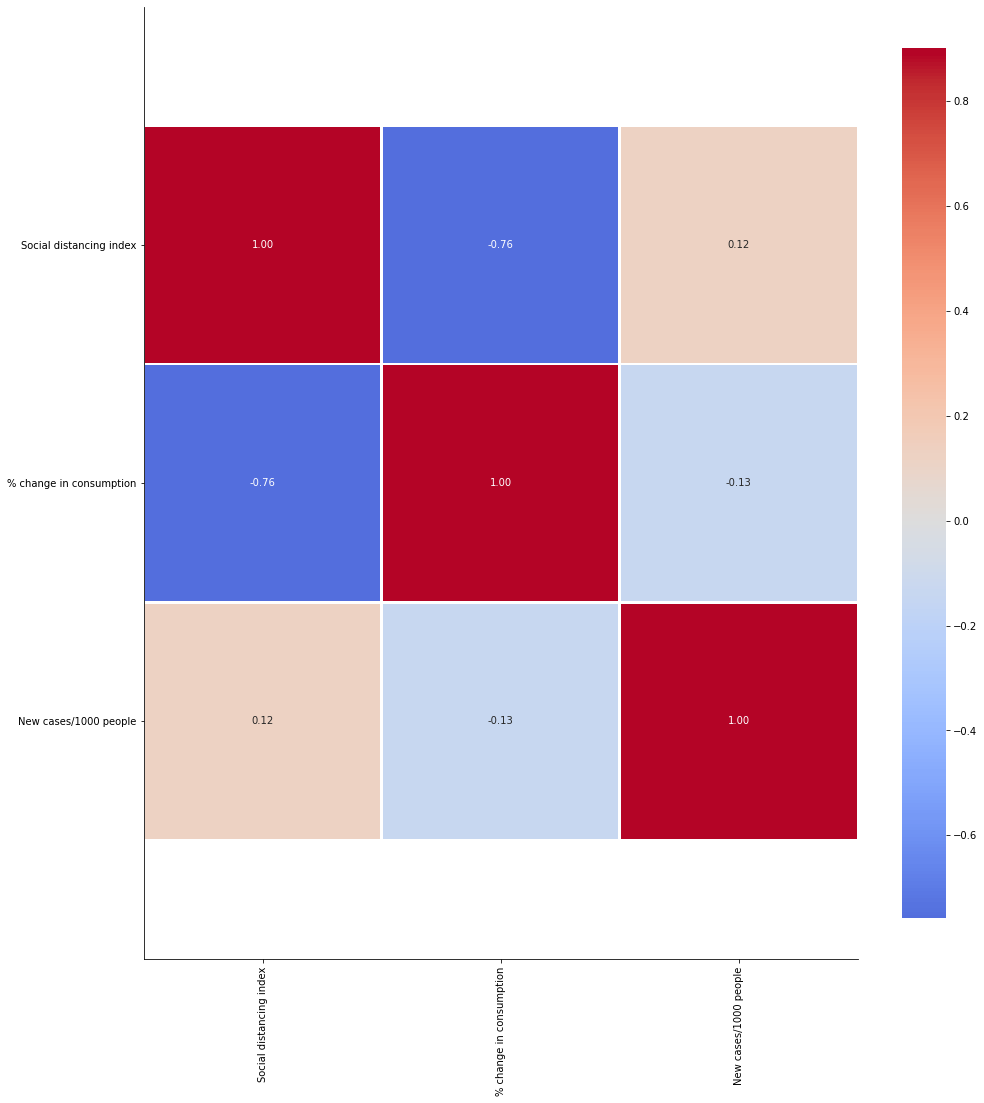

In [97]:
corr = cluster_0_0_0_2[social_dist].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 2.mobility

In [98]:
mobility


['CTNAME',
 '% staying home',
 'Trips/person',
 '% out-of-county trips',
 '% out-of-state trips',
 'Miles/person',
 'Work trips/person',
 'Non-work trips/person',
 'Transit mode share',
 '% working from home',
 'New cases/1000 people']

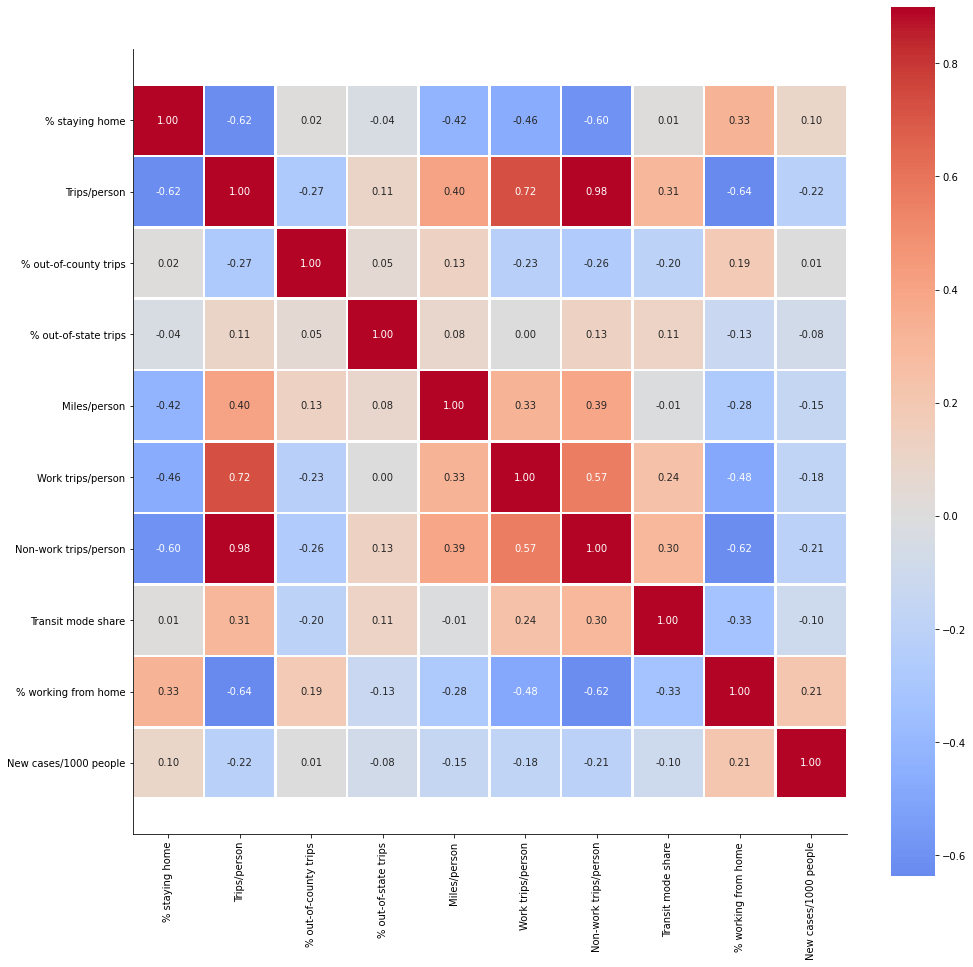

In [99]:
corr = cluster_0_0_0_2[mobility].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 3.demographic

In [100]:
demographic

['CTNAME',
 '% people older than 60',
 'Median income',
 '% African Americans',
 '% Hispanic Americans',
 '% Male',
 'Population density',
 'Employment density',
 '# hot spots/1000 people',
 'Hospital beds/1000 people',
 'ICUs/1000 people',
 '# contact tracing workers/1000 people',
 '% hospital bed utilization',
 'Testing capacity',
 'Tests done/1000 people',
 '% ICU utilization',
 'Ventilator shortage',
 'Imported COVID cases',
 'COVID exposure/1000 people',
 'New cases/1000 people']

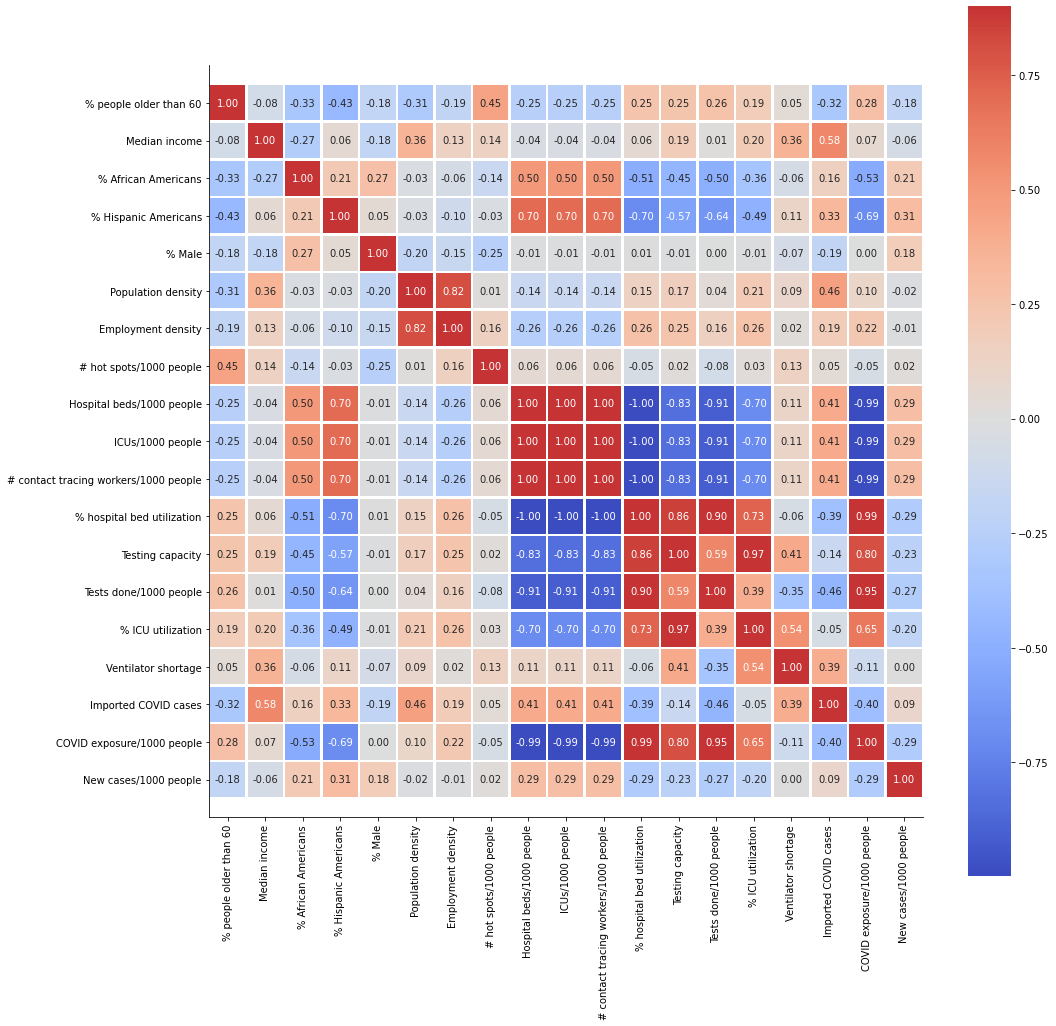

In [101]:
corr = cluster_0_0_0_2[demographic].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 4.employment

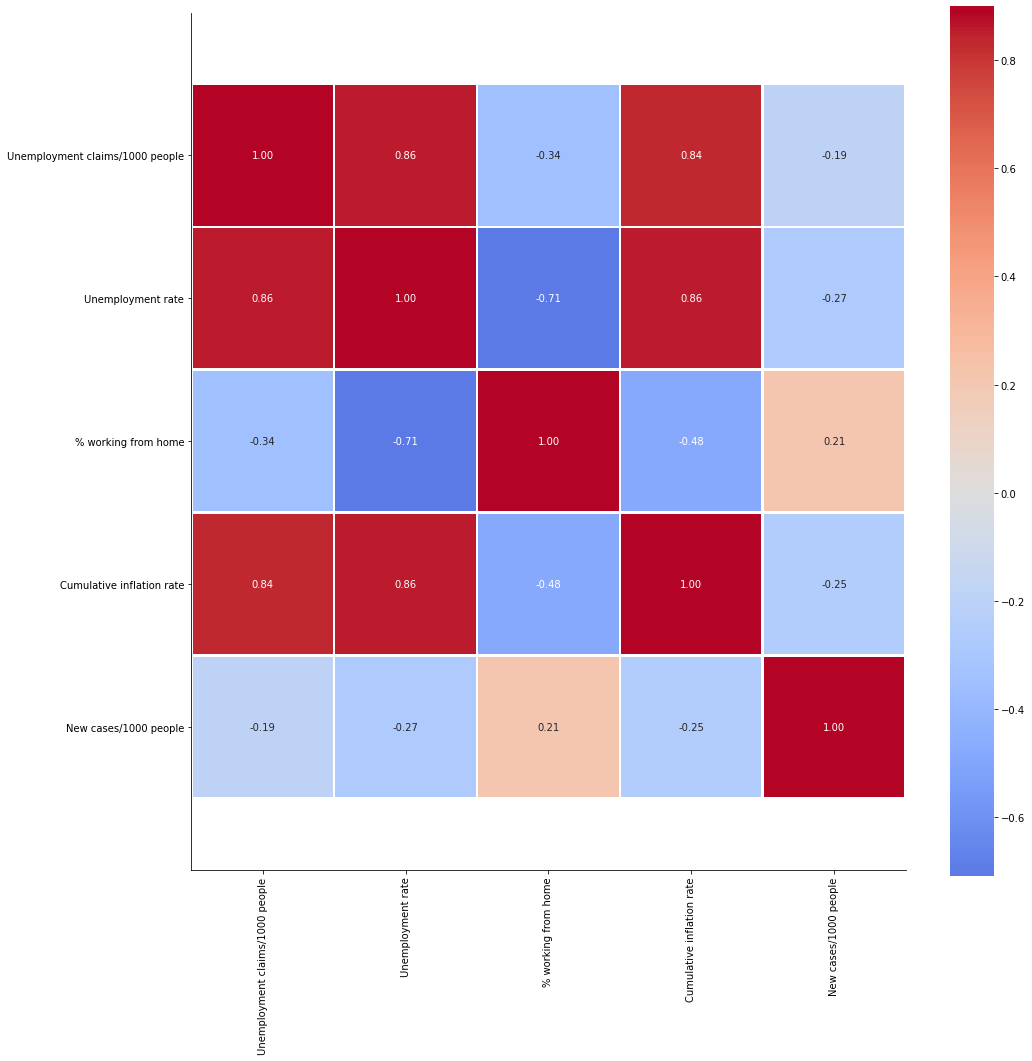

In [102]:
corr = cluster_0_0_0_2[employment].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 5.Pos_columns

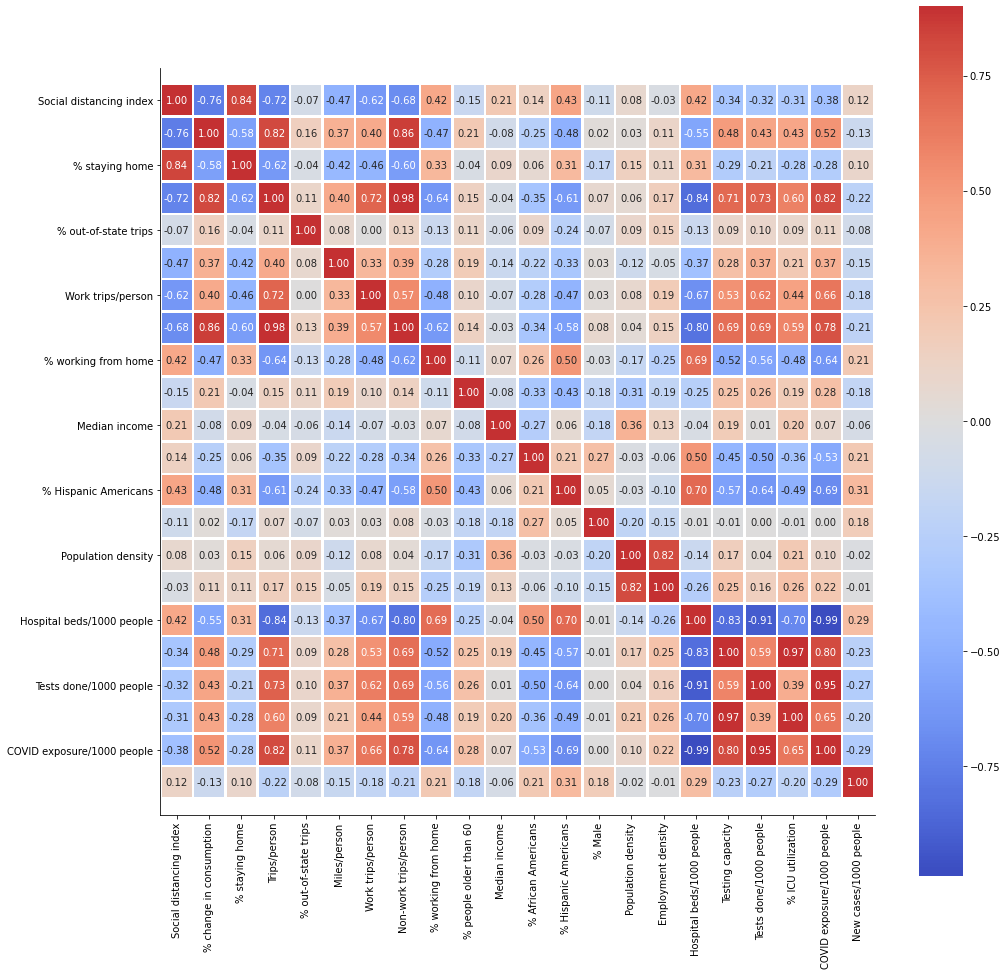

In [103]:
pos_cor_columns = ['CTNAME','Social distancing index','% change in consumption',
                   '% staying home','Trips/person','% out-of-state trips','Miles/person',
                   'Work trips/person','Non-work trips/person','% working from home',
                   '% people older than 60','Median income','% African Americans', '% Hispanic Americans','% Male','Population density',
                   'Employment density','Hospital beds/1000 people','Testing capacity','Tests done/1000 people',
                   '% ICU utilization','COVID exposure/1000 people',
                    'New cases/1000 people']
corr = cluster_0_0_0_2[pos_cor_columns].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

## Cluster_1

From analysis: Here one county is forming a cluster. That county is 'New York County'

In [40]:
maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_1']['New cases/1000 people'].shape

(574,)

In [41]:
cluster_1= maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_1']
cluster_1.reset_index(drop=True)

State Postal Code  STFIPS  ...  COVID death rate cluster  cluster_label
0    New York          NY      36  ...              0.00       1      cluster_1
1    New York          NY      36  ...              0.00       1      cluster_1
2    New York          NY      36  ...              0.00       1      cluster_1
3    New York          NY      36  ...              0.00       1      cluster_1
4    New York          NY      36  ...              0.00       1      cluster_1
..        ...         ...     ...  ...               ...     ...            ...
569  New York          NY      36  ...              9.42       1      cluster_1
570  New York          NY      36  ...              9.42       1      cluster_1
571  New York          NY      36  ...              9.42       1      cluster_1
572  New York          NY      36  ...              9.42       1      cluster_1
573  New York          NY      36  ...              9.42       1      cluster_1

[574 rows x 47 columns]

In [42]:
cluster_1['New cases/1000 people']

0      0.0000
1      0.0000
2      0.0000
3      0.0000
4      0.0000
        ...  
569    0.1091
570    0.1057
571    0.0950
572    0.0719
573    0.0653
Name: New cases/1000 people, Length: 574, dtype: float64

In [43]:
cluster_1.head(2)

State Postal Code  STFIPS  ...  COVID death rate cluster  cluster_label
0  New York          NY      36  ...               0.0       1      cluster_1
1  New York          NY      36  ...               0.0       1      cluster_1

[2 rows x 47 columns]

### States

In [44]:
#states of cluster one

cluster_1.State.unique()


array(['New York'], dtype=object)

In [143]:
cluster_1.CTNAME.nunique()

2

In [142]:
cluster_1.CTNAME.unique()

array(['Bronx County', 'Kings County'], dtype=object)

In [45]:
#min max of new cases by group

cluster_1.groupby(['CTNAME']).agg({'New cases/1000 people': ['mean', 'min', 'max']})

New cases/1000 people             
                              mean  min     max
CTNAME                                         
Bronx County              0.007321  0.0  0.0510
Kings County              0.010575  0.0  0.1124

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


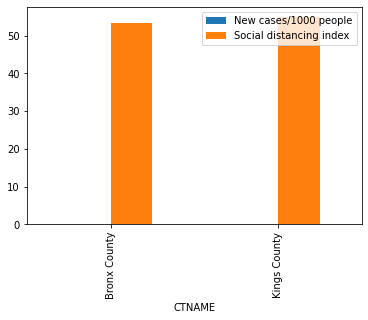

In [46]:
cluster_1.groupby(["CTNAME"])['New cases/1000 people', 'Social distancing index'].mean().plot(kind='bar')

In [47]:
## Min value of all column

cluster_1.min(axis=0) # will return min value of each column

State                                        New York
Postal Code                                        NY
STFIPS                                             36
CTFIPS                                          36005
CTNAME                                   Bronx County
Social distancing index                            22
% staying home                                     28
Trips/person                                     1.48
% out-of-county trips                            21.7
% out-of-state trips                              1.8
Miles/person                                      8.4
Work trips/person                                0.25
Non-work trips/person                            1.23
New COVID cases                                     0
Population                                    1432132
% change in consumption                         -55.8
date                                       2020-01-01
Transit mode share                              59.89
% people older than 60      

In [48]:
## Max value of all column

cluster_1.max(axis=0) # will return max value of each column

State                                        New York
Postal Code                                        NY
STFIPS                                             36
CTFIPS                                          36047
CTNAME                                   Kings County
Social distancing index                            87
% staying home                                     71
Trips/person                                     3.99
% out-of-county trips                            42.2
% out-of-state trips                              7.4
Miles/person                                     69.1
Work trips/person                                0.82
Non-work trips/person                            3.28
New COVID cases                                   358
Population                                    2582830
% change in consumption                          17.8
date                                       2020-10-13
Transit mode share                              61.36
% people older than 60      

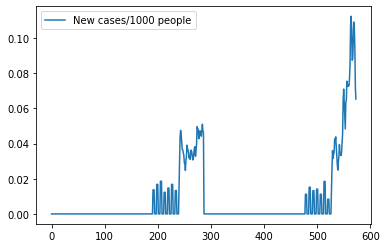

In [49]:
cluster_1[['date','New cases/1000 people']].plot()

In [50]:
cluster_1['date'].unique()

array(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
       '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
       '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
       '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

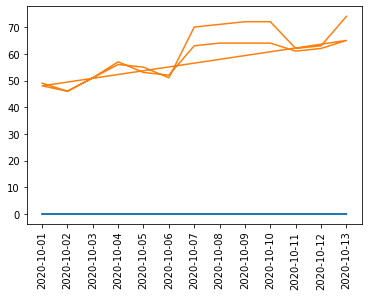

In [51]:
plt.figure()

date_list = ['2020-10-01', '2020-10-02',
       '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06',
       '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
       '2020-10-11', '2020-10-12', '2020-10-13']

filter_data = cluster_1[cluster_1['date'].isin(date_list)]
x = filter_data['date']
y1 = filter_data['New cases/1000 people'] 
y2 = filter_data['Social distancing index']


plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


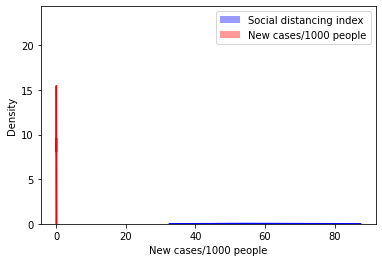

In [52]:
# Method 1: on the same Axis
date_list = ['2020-10-01', '2020-10-02',
       '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06',
       '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
       '2020-10-11', '2020-10-12', '2020-10-13']

filter_data = cluster_1[cluster_1['date'].isin(date_list)]

sns.distplot( (filter_data['Social distancing index']) , color="blue", label='Social distancing index')
sns.distplot( filter_data['New cases/1000 people'] , color="red", label='New cases/1000 people')
plt.legend()
 
plt.show()


This code is not working. I was trying to plot this link: https://stackoverflow.com/questions/43382051/how-to-plot-min-max-line-plot-in-python-pandas


data = cluster_1.groupby('date')['New cases/1000 people'].agg({'Low Value':'min','High Value':'max','Mean':'mean'})
data.reset_index(inplace=True)

ax  = data.plot(x='date', y='Mean', c='white')
plt.fill_between(x='date',y1='Low Value',y2='High Value', data=data)

### Group Columns

In [135]:
cluster_1.columns

Index(['State', 'Postal Code', 'STFIPS', 'CTFIPS', 'CTNAME',
       'Social distancing index', '% staying home', 'Trips/person',
       '% out-of-county trips', '% out-of-state trips', 'Miles/person',
       'Work trips/person', 'Non-work trips/person', 'New COVID cases',
       'Population', '% change in consumption', 'date', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people', 'New cases/1000 people',
       'Active cases/1000 people', '#days: decreasing COVID cases',
       '% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 p

In [136]:
filter_col= ['Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','% change in consumption','Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

social_dist= ['CTNAME','Social distancing index','% change in consumption', 'New cases/1000 people']

mobility = ['CTNAME','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','Transit mode share',
       '% working from home', 'New cases/1000 people']

demographic = ['CTNAME','% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density','# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people','New cases/1000 people']

employment = ['CTNAME','Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

### Correlation Plot

In [153]:
pos_cor_columns = ['CTNAME','Social distancing index','% change in consumption',
                   '% staying home','Trips/person','Work trips/person','% working from home',
                   'Median income','% African Americans', '% Hispanic Americans','% Male','Population density',
                   'Employment density','Hospital beds/1000 people','Testing capacity','Tests done/1000 people',
                   '% ICU utilization','COVID exposure/1000 people',
                    'New cases/1000 people']

#### 1.social_dist

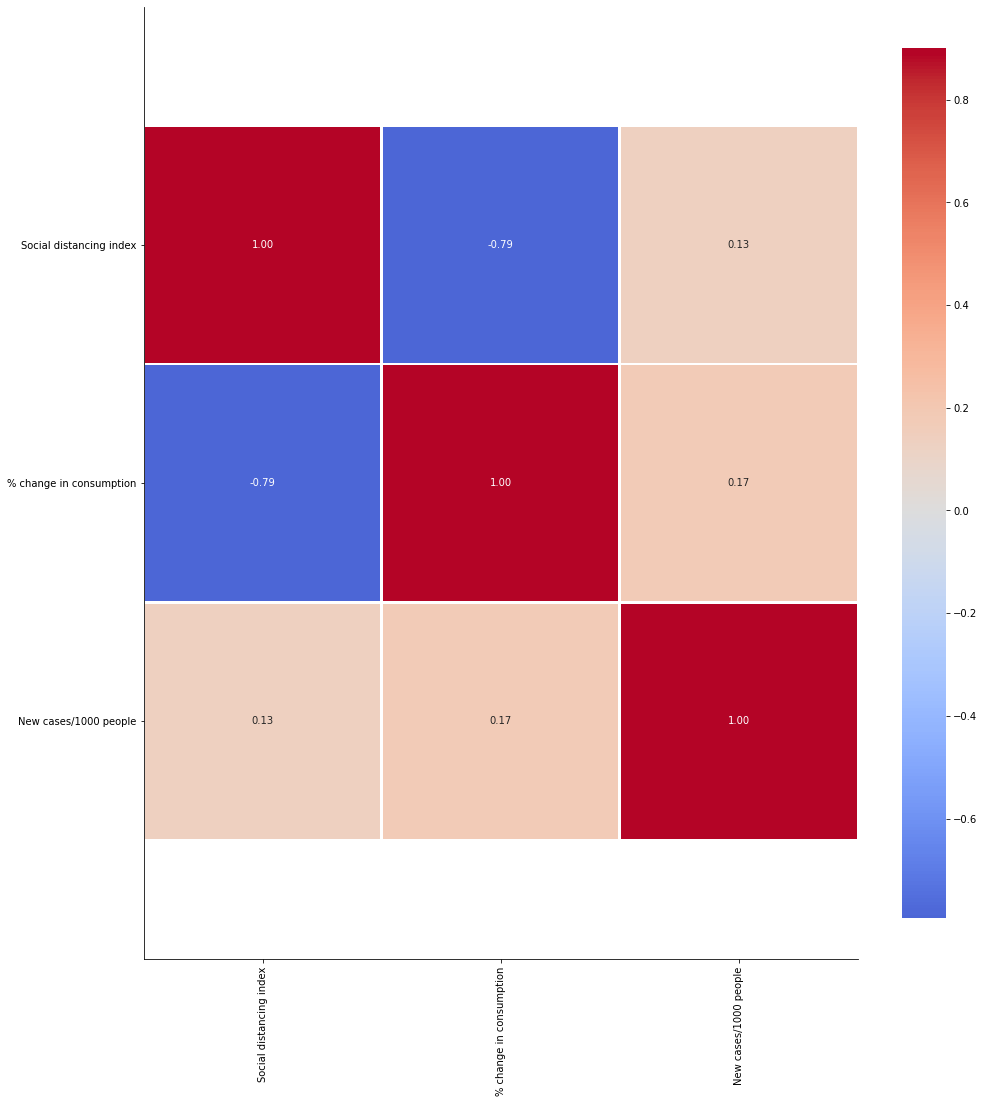

In [138]:
corr = cluster_1[social_dist].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 2.mobility

In [154]:
mobility

['CTNAME',
 '% staying home',
 'Trips/person',
 '% out-of-county trips',
 '% out-of-state trips',
 'Miles/person',
 'Work trips/person',
 'Non-work trips/person',
 'Transit mode share',
 '% working from home',
 'New cases/1000 people']

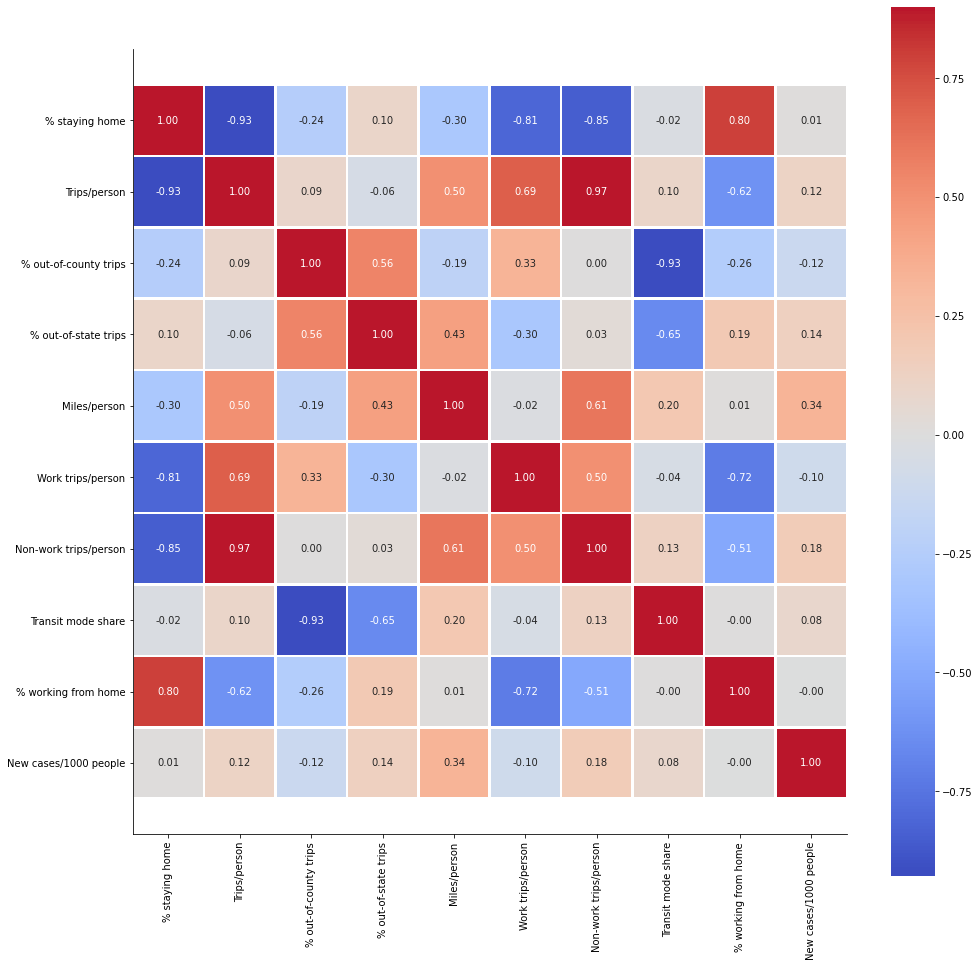

In [139]:
corr = cluster_1[mobility].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 3.demographic

In [157]:
demographic



['CTNAME',
 '% people older than 60',
 'Median income',
 '% African Americans',
 '% Hispanic Americans',
 '% Male',
 'Population density',
 'Employment density',
 '# hot spots/1000 people',
 'Hospital beds/1000 people',
 'ICUs/1000 people',
 '# contact tracing workers/1000 people',
 '% hospital bed utilization',
 'Testing capacity',
 'Tests done/1000 people',
 '% ICU utilization',
 'Ventilator shortage',
 'Imported COVID cases',
 'COVID exposure/1000 people',
 'New cases/1000 people']

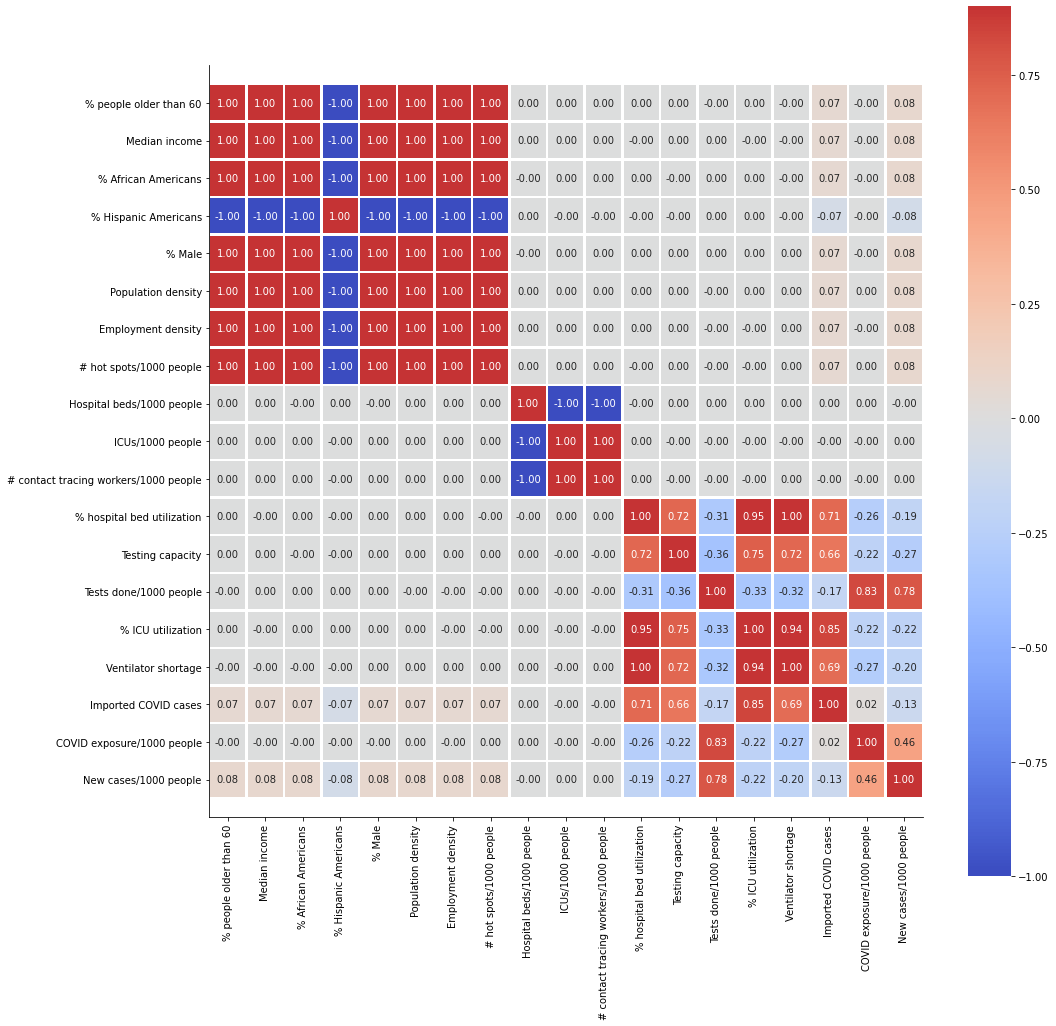

In [140]:
corr = cluster_1[demographic].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 4.employment

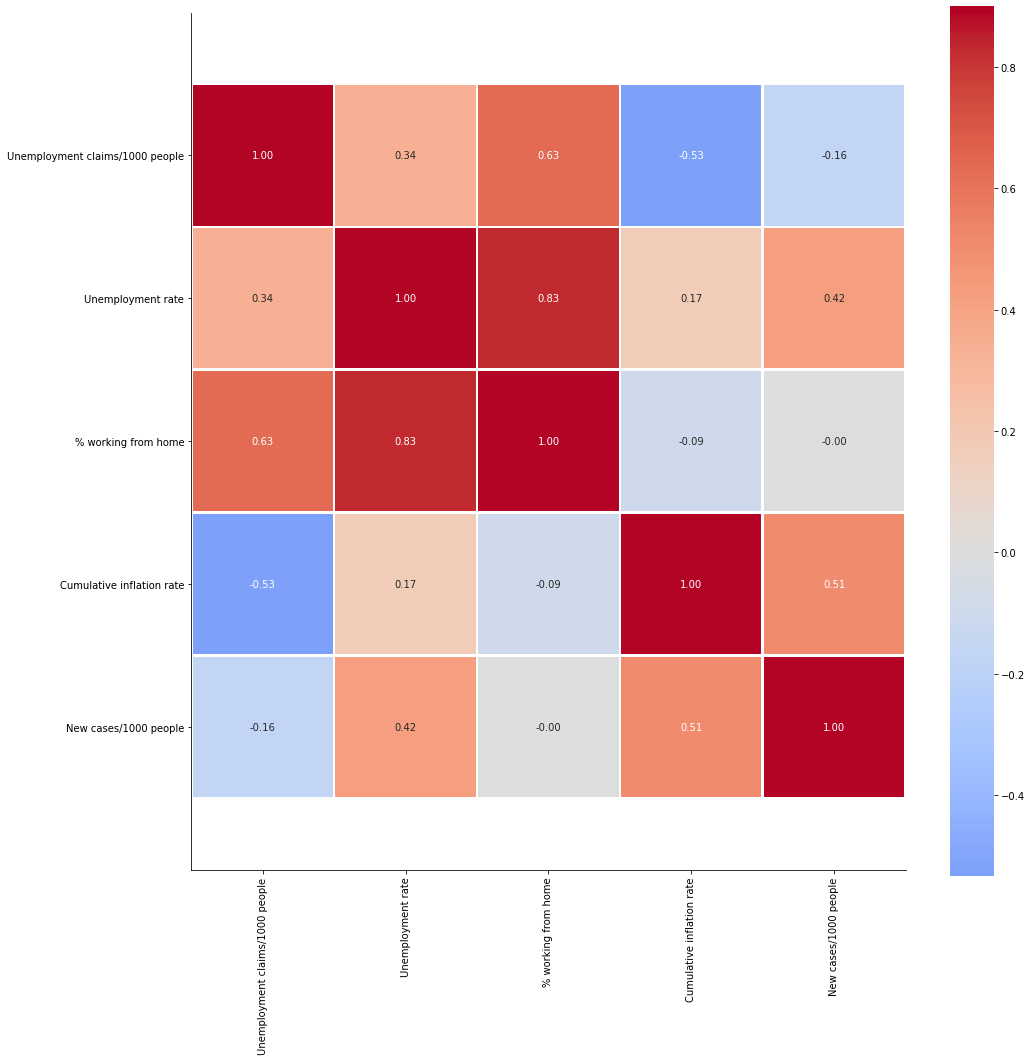

In [141]:
corr = cluster_1[employment].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 5.Pos_columns

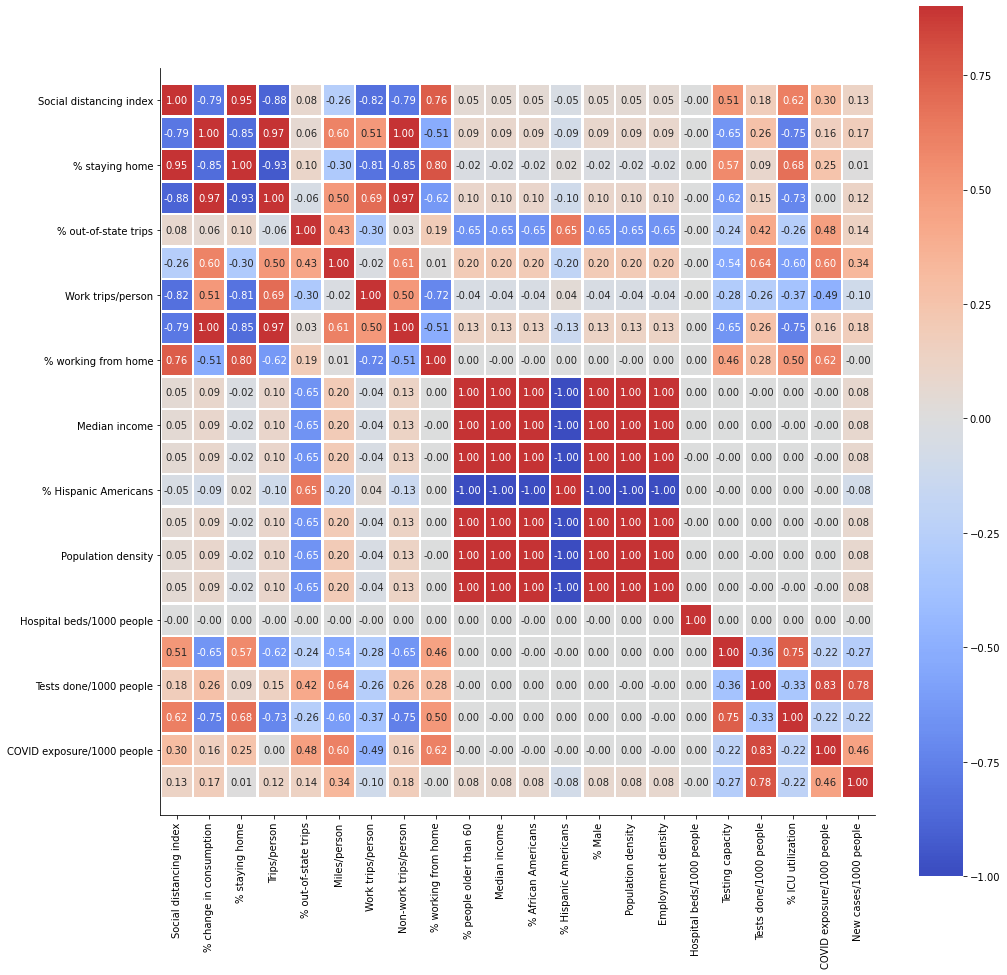

In [160]:
pos_cor_columns = ['CTNAME','Social distancing index','% change in consumption',
                   '% staying home','Trips/person','% out-of-state trips','Miles/person',
                   'Work trips/person','Non-work trips/person','% working from home',
                   '% people older than 60','Median income','% African Americans', '% Hispanic Americans','% Male','Population density',
                   'Employment density','Hospital beds/1000 people','Testing capacity','Tests done/1000 people',
                   '% ICU utilization','COVID exposure/1000 people',
                    'New cases/1000 people']
corr = cluster_1[pos_cor_columns].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)